In [1]:
from google.colab import drive
drive.mount('/content/drive') #mount google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #install NanumBarunGothic font

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #install NanumBarunGothic font

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib.pyplot
from wordcloud import WordCloud

plt.rc("font", family = "NanumBarunGothic") #font setting at plt
sns.set(font = 'NanumBarunGothic', rc={'axes.unicode_minus':False,'figure.figsize':(20, 10)},style = 'darkgrid') #font setting at sns

In [ ]:
text_df = pd.read_csv('/content/drive/MyDrive/백업 자료/백업 자료/intro_of_big_data/team work/team work data/한국언론진흥재단_디지털성범죄 관련 메타데이터 (2016.12.28-2019.09.30).csv', encoding = 'utf-8') #load data
text_df = text_df.drop(columns = ["주소"],axis = 1).dropna(axis=1) #preprocessing(결측치 존재 칼럼 데이터 전체 제거, 주소 칼럼 데이터 제거)
text_df.head(10)

In [5]:
text_df["언론사"].unique() #언론사 종류 확인

array(['한국일보', 'OBS', '매일경제', '내일신문', '경향신문', '세계일보', '한겨레', '머니투데이',
       '헤럴드경제', '아시아경제', '서울신문', '파이낸셜뉴스', '서울경제', 'KBS', '경기일보', '중도일보',
       '문화일보', '국민일보', '부산일보', '한국경제', '전자신문', '중부일보', '아주경제', '경인일보',
       '국제신문', '강원일보', '충청투데이', '충북일보', '중부매일', '디지털타임스', '강원도민일보',
       '대전일보', '충청일보', '중앙일보', '동아일보', '한라일보', '광주매일신문', '조선일보', 'YTN',
       '제민일보', '경남도민일보', 'MBC', '전북도민일보', '울산매일', '경남신문', '전북일보', '매일신문',
       '대구일보', 'SBS', '전남일보', '경상일보'], dtype=object)

In [6]:
freq = text_df['언론사'].value_counts() #언론사 별 보도 빈도 카운트
brod_df = pd.DataFrame(freq).reset_index() # 데이터 프레임 제작  + 인덱스 초기화
brod_df.rename(columns = {'index':'언론사', '언론사':'기사'}, inplace = True) #칼럼 이름 설정
brod_df

,언론사,기사
0,아시아경제,94
1,머니투데이,92
2,경향신문,57
3,한겨레,42
4,세계일보,40
5,한국일보,38
6,서울경제,35
7,헤럴드경제,34
8,국민일보,31
9,중앙일보,26


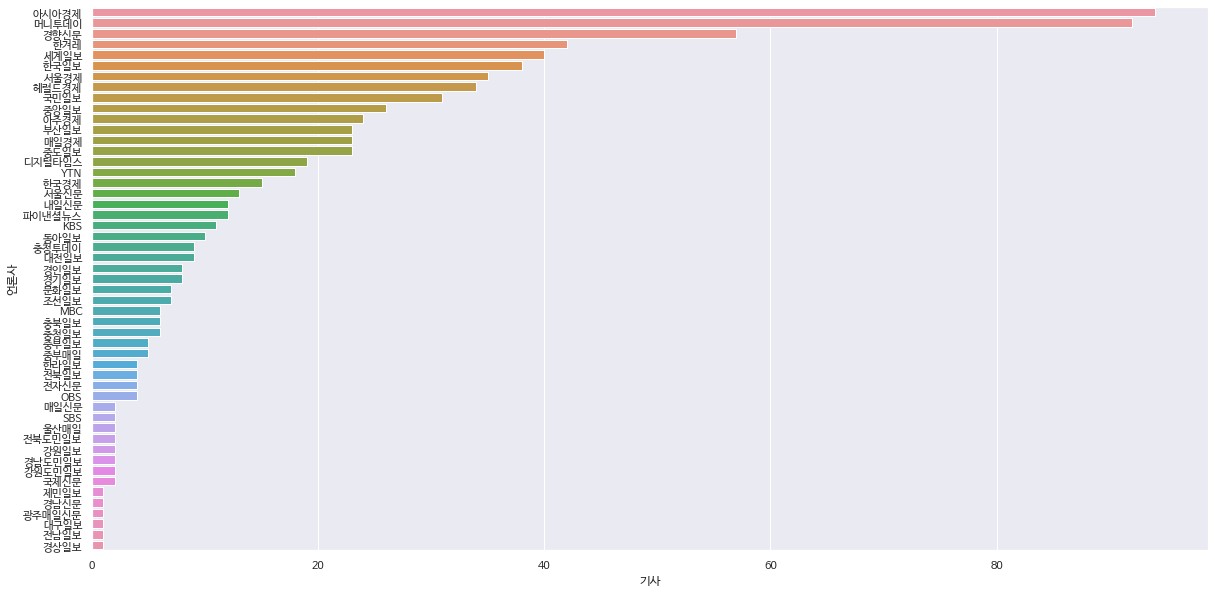

In [7]:
sns.barplot(x = '기사', y = '언론사', data = brod_df) #보도 빈도 시각화

#조선일보

###모든 언론사들의 키워드는 동일한 파싱 알고리즘으로 추출

###각주는 조선일보 부분에만 삽입

In [8]:
josun_df = text_df[text_df['언론사'].str.contains('조선일보')] #조선일보의 기사 추출
josun_df = josun_df.drop(index = [186,781]) #분석 가치 없는 기사 제거(다른 언론사 분석에는 해당 부분이 없는 경우가 많음)
josun_df

,일자,언론사,제목,키워드,특성추출,본문
276,2018-07-12,조선일보,"지우고 지워도 뜨는 몰카 영상… 좀비랑 싸우는 기분""""","몰카,영상,기분,삭제,직원들,상담,피해자,상담,100%,인터넷,특성상,100%,불가...","피해자,한국,미국,연방법,8명,달여,서승희,한사,가해자,한사성,팀장,상담원,불가능,...",삭제가 어렵기 때문에 직원들은 첫 상담 때 피해자에게 인터넷 특성상 100% 없애기...
296,2018-07-31,조선일보,"방통위, 디지털성범죄 영상물 유통 4584건 적발…상습유포 ID 297개 수사 의뢰","방통위,디지털성,범죄,영상물,유통,적발,상습유포,ID,수사,의뢰,방송통신위원회,불법...","영상물,사업자,디지털성,웹하드,방통위,4584건,불법촬영물,웹하드사업자,형법상,음란...","..일 불법촬영물, 비공개촬영사진 등 디지털성범죄 영상물 유통 차단을 위해 실시하고..."
476,2018-11-16,조선일보,당정 “디지털성범죄 처벌 강화 법안 처리에 최선”,"당정,디지털,범죄,처벌,강화,법안,처리,최선,더불어민주당,정부,디지털,성범죄,근절,...","성범죄,법무부,정책위의장,피해자,정기국회,등록제,웹하드,위원장,여성가족부,박상기,영...",디지털성범죄 차단과 피해자 지원을 위한 정부의 노력에도 불구하고 관련 입법의 재개정...
557,2019-01-24,조선일보,웹하드 카르텔 가담자 '최소 징역'...불법음란물 유통 근절,"징역,웹하드,카르텔,가담자,최소,불법음란물,유통,근절,웹하드,카르텔,가담자,징역형,...","웹하드,불법음란물,음란물,피해자,불법촬영물,사업자,방송통신심의위원회,불법비디오물,국...",앞으로 ‘웹하드 카르텔’ 주요 가담자는 징역형으로만 처벌 받게 된다. 불법음란물 신...
572,2019-02-12,조선일보,"방통위, 음란물·도박 사이트 차단 고도화…개인 검열 논란","방통위,음란물,도박,고도화,사이트,차단,고도,개인,검열,논란,방송통신위원회,불법음란...","이용자,방통위,인터넷사이트,방송통신위원회,사업자,https,접속차단,음란물,불법정보...",방송통신위원회는 불법음란물 및 불법도박 등 불법정보를 보안접속(https) 및 우회...


In [11]:
josun_cha_df = josun_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index') #언론사, 제목, 키워드 칼럼만 추출, 인덱스 칼럼 제거
josun_cha_df

,언론사,제목,키워드
0,조선일보,"지우고 지워도 뜨는 몰카 영상… 좀비랑 싸우는 기분""""","몰카,영상,기분,삭제,직원들,상담,피해자,상담,100%,인터넷,특성상,100%,불가..."
1,조선일보,"방통위, 디지털성범죄 영상물 유통 4584건 적발…상습유포 ID 297개 수사 의뢰","방통위,디지털성,범죄,영상물,유통,적발,상습유포,ID,수사,의뢰,방송통신위원회,불법..."
2,조선일보,당정 “디지털성범죄 처벌 강화 법안 처리에 최선”,"당정,디지털,범죄,처벌,강화,법안,처리,최선,더불어민주당,정부,디지털,성범죄,근절,..."
3,조선일보,웹하드 카르텔 가담자 '최소 징역'...불법음란물 유통 근절,"징역,웹하드,카르텔,가담자,최소,불법음란물,유통,근절,웹하드,카르텔,가담자,징역형,..."
4,조선일보,"방통위, 음란물·도박 사이트 차단 고도화…개인 검열 논란","방통위,음란물,도박,고도화,사이트,차단,고도,개인,검열,논란,방송통신위원회,불법음란..."


In [12]:
josun_cha_lis = josun_cha_df.values.tolist() #리스트로 변환
for i in range(len(josun_cha_lis)): 
  josun_cha_lis[i].remove('조선일보') #언론사 이름 부분 제거
  del josun_cha_lis[i][0] #기사 제목 부분 제거
josun_cha_lis

[['몰카,영상,기분,삭제,직원들,상담,피해자,상담,100%,인터넷,특성상,100%,불가능,상담원,B씨,피해자,지옥,고문,희망,피해자들,센터,도움,경찰,수사,요청,달여,달여,정도,100명,피해자,3명,이은정,상담,팀장,피해자,처지,경찰,신고,신체,증거,부담,수사,가해자,생각,사람,센터,보안,중시,10평,남짓,센터,금남,禁男,구역,상담,4명,삭제,지원,8명,12명,여성,유출,피해자,정보,팀장,제외,근무자,이름,공개,센터,관계자,요원,직원,선발,국가정보원,선발,과거,경력,검증,센터,사무실,내부,2분,직원,옆방,회의실,남성,신고자,4일,경찰,영상,유포,사이버,테러,사안,수사,영상,불법,촬영,등장,남성들,피해자,영상,센터,관계자,경찰,처벌,가해자,자신,피해자,주장,해외,서버,사이트,영상,한국,여성들,미국,의회,상대,연방법,제정,요구,움직임,한국사이버성폭력대응센터,한사성,이달,미국,의회,유포자,불법,촬영물,처벌,연방법,통과,탄원서,대표,서승희,한사,미국,35개,유포자,불법,촬영물,처벌,연방법,한국,경찰,수사,공조,요청,제대로'],
 ['방통위,디지털성,범죄,영상물,유통,적발,상습유포,ID,수사,의뢰,방송통신위원회,불법촬영물,비공개촬영사진,디지털성,범죄,차단,영상물,유통,집중,점검,5월,29일,9월,4일,중간,결과,후속조치,중간점검,방통위,웹하드사업자,웹하드,사업자,PC,사이트,모바일,대상,4584건,디지털성,범죄,사례,영상물,유통,적발,사업자,즉시,삭제,조치,유통사례,조사,사업자,이행여부,조치,이행,여부,현장점검,위반사항,적발,행정처분,과태료,등록,취소,요청,예정,조치,불법,정보,인식,수신,제한,운영,자체,모니터링,경고문,발송,웹하드,사이트,지속적,디지털성,범죄,영상물,유포,부당,이득,상습,유포자,계정,ID,유포죄,형법상,음란물,처벌,경찰,수사,의뢰,계정,2848건,유포,불법성,여부,판단,500건,방송통신심의위원회,심의,요청,예정,방통위,디지털성,범죄,영상물,이용,부당이득,행위,근절,영상물,불법광고,060전화,정보서비스,회선,기간통신사업자,KT,LG유플러스,SK브로드밴

In [13]:
josun_key = []
josun_value = []
for i in range(len(josun_cha_lis)):
  for word in josun_cha_lis[i]:
      word = word.split(',') #',' 기점으로 스트링 분리
      josun_key.append(word) #분리된 단어들을 리스트에 새로 정렬
for j in josun_key:
  j = list(set(j)) #중복 제거
  josun_value.append(j) #제거된 리스트를 새로운 리스트에 삽입

In [14]:
josun_words = {}
for k in range(len(josun_value)):
  for i in josun_value[k]:
      if i not in josun_words:
        josun_words[i] = 1 #최초 언어
      elif i in josun_words:
        josun_words[i] += 1 #중복 언어
print(josun_words)

{'서버': 1, '근무자': 1, '가해자': 1, '12명': 1, '불가능': 2, '한사성': 1, '구역': 1, '사무실': 1, '달여': 1, '촬영물': 2, '사이트': 3, '금남': 1, '대표': 1, '상담': 1, '움직임': 1, '경찰': 3, '4일': 2, '중시': 1, '테러': 1, '여성': 2, '피해자': 4, '禁男': 1, '정도': 2, '제대로': 1, '처지': 1, '영상': 1, '서승희': 1, '직원': 1, '기분': 1, '생각': 1, '센터': 1, '옆방': 1, '여성들': 2, '제외': 1, '회의실': 1, '도움': 1, '상담원': 1, 'B씨': 1, '관계자': 3, '의회': 1, '지옥': 1, '해외': 2, '고문': 1, '피해자들': 1, '탄원서': 1, '공조': 1, '사이버': 2, '증거': 1, '부담': 1, '선발': 1, '상대': 1, '정보': 4, '2분': 1, '국가정보원': 1, '한사': 1, '한국사이버성폭력대응센터': 1, '인터넷': 3, '희망': 1, '유포': 4, '검증': 1, '100%': 1, '내부': 1, '통과': 2, '남짓': 1, '특성상': 1, '요원': 1, '공개': 1, '4명': 1, '수사': 3, '한국': 1, '불법': 5, '사안': 1, '이름': 1, '3명': 1, '경력': 1, '사람': 1, '유포자': 3, '팀장': 1, '주장': 1, '삭제': 2, '신고자': 1, '제정': 1, '자신': 1, '남성': 1, '처벌': 4, '100명': 1, '연방법': 1, '신체': 1, '요구': 1, '과거': 1, '미국': 1, '이은정': 1, '유출': 1, '8명': 1, '남성들': 1, '지원': 3, '몰카': 2, '보안': 2, '이달': 1, '등장': 1, '35개': 1, '10평': 1, '신고': 2, '촬영': 2, '요청': 3, '직원들': 1

In [15]:
josun_word_df = pd.DataFrame(josun_words.items()) #딕셔너리 --> 데이터 프레임 
josun_word_df.columns = ['단어', '빈도'] #칼럼 명 설정
josun_word_df = josun_word_df.sort_values(['빈도'],ascending = False).head(20) #빈도 기준 내림차순 정렬 및 상위 20개만 추출
josun_word_df

,단어,빈도
70,불법,5
84,처벌,4
169,차단,4
20,피해자,4
58,유포,4
51,정보,4
180,불법촬영물,4
106,사업자,4
114,유통,4
177,범죄,4


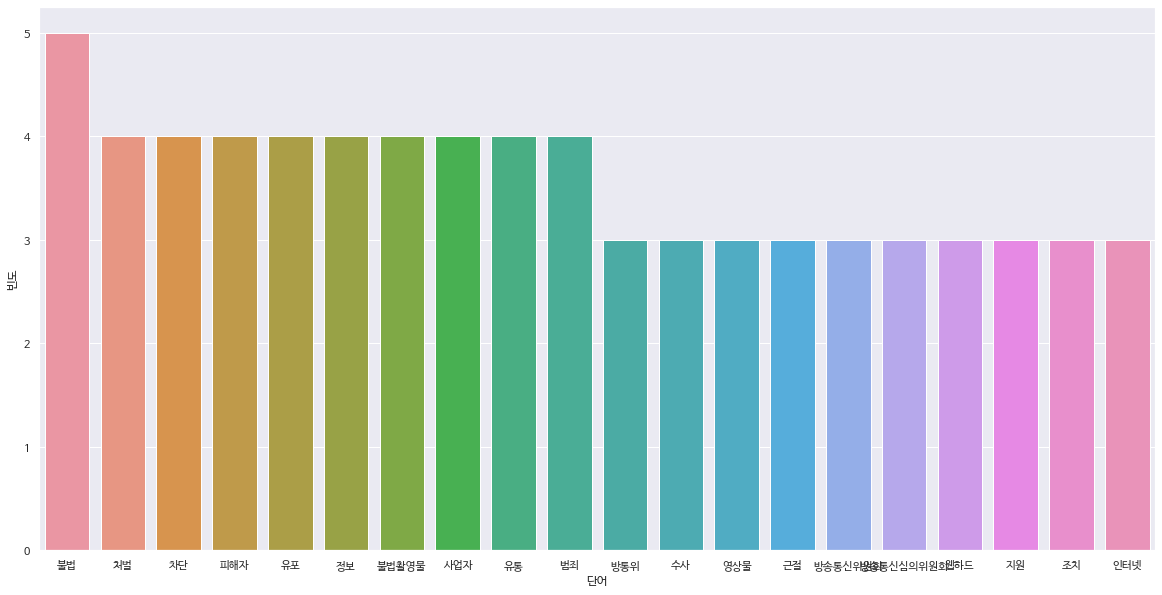

In [16]:
sns.barplot(x = '단어', y = '빈도', data=josun_word_df) #키워드 빈도 시각화

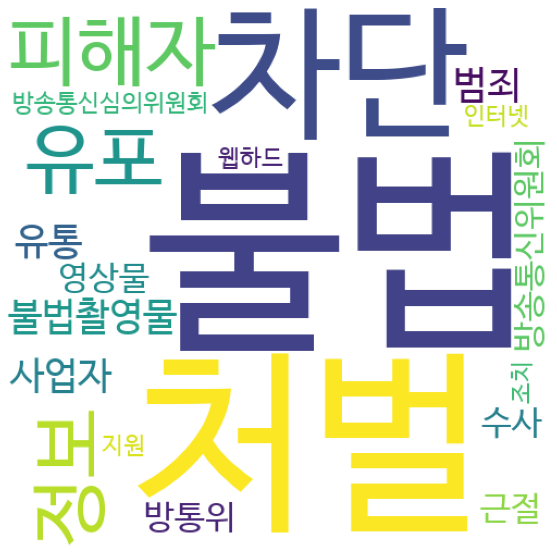

In [17]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(josun_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#한겨레

In [18]:
hani_df = text_df[text_df['언론사'].str.contains('한겨레')]
hani_df

,일자,언론사,제목,키워드,특성추출,본문
6,2017-03-07,한겨레,"서울시, 혐오문화·데이트폭력·디지털성범죄 추방 나선다","서울시,혐오문화,데이트폭력,디지털성,범죄,추방,서울시,데이트폭력,디지털성,범죄,추방...","성평등,서울시,데이트폭력,피해자,전문기관,혐오문화,화장실,3만,강남역,맞춤형,엄규숙...","서울시가 데이트폭력과 디지털성범죄 추방에 적극 나선다. 이를 위해 올해 데이트폭력,..."
20,2017-06-26,한겨레,‘몰카 극성’ 불안한 여성들 “탐지기라도 쓸 수밖에…”,"몰카,극성,불안,여성들,탐지기,서울,연세대,재학중,학기,여학생회,카메라,탐지기,차례...","탐지기,경찰청,이씨,여자화장실,디에스오,임세연,온라인,여성들,관계자,사회단체,임소영...",서울 연세대에 재학중인 이아무개(21)씨는 이번 학기에만 총여학생회에서 몰래카메라 ...
23,2017-07-13,한겨레,“대한민국이 바로 페미니스트 양성소”,"대한민국,페미니스트,양성소,대한민국,페미니스트,고백,유숙열,이프북스,1만,5월,대한...","이프,한국,대한민국,신문사,페미니스트저널,60대,여성들,누리집,유숙열,조박선영,임명...","대한민국 페미니스트의 고백 유숙열 외/이프북스·1만3000원 1997년 5월, 대..."
32,2017-08-30,한겨레,"몰카, 국내 웹하드 업체부터 잡아라","몰카,업체,웹하드,디지털성,범죄아웃,DSO,활동가들,11월,웹하드,몰카,카메라,영상...","웹하드,서울,방통위,성폭력,음란물,활동가,활동가들,업체들,서승희,유통시장,누리집,디...",‘디지털성범죄아웃’(DSO) 활동가들은 지난해 11월부터 석달 간 국내 웹하드에 올...
37,2017-09-06,한겨레,수사기관만큼 방통위·방심위 역할 중요,"수사기관,방통위,방심위,역할,중요,한국사이버성폭력대응센터,한사성,활동가들,방송통신위...","웹하드,방통위,방심위,성범죄,활동가,음란물,영상물,한사,한사성,국정과제,불가능,전자지문",한국사이버성폭력대응센터(한사성) 활동가들은 최근 ‘방송통신위원회(방통위)의 힘’을 ...
38,2017-09-06,한겨레,"내 영상이 돌다니…“몰카, 지워도 지워도 끝나지 않는 지옥”","영상,몰카,지옥,피해자,가해자,몰카,리벤지,포르노,디지털,성범죄,피해자들,정신적,경...","ㄱ씨,피해자,ㄴ씨,성폭력,유포자,머릿속,피해자들,변호사,성범죄,벌금형,방심위,음란물...","피해자는 있는데, 가해자는 없다. ‘몰카’, ‘리벤지 포르노’ 등으로 불리는 ‘디지..."
39,2017-09-06,한겨레,내 ‘몰카 영상’ 발견했을 때 대처법,"몰카,영상,발견,대처법,피해자,디지털,성범죄,속도,생명,증거,수집,신고,가해자,신고...","성폭력,고객센터,피해자,경찰서,대표전화,여성가족부,유해정보,방송통신심의위원회,한국사...",디지털 성범죄 피해자가 됐다면 ‘빠르게’를 잊지 말아야 한다. 속도가 생명이다. 증...
40,2017-09-06,한겨레,불법영상 걸릴때 대처법까지 공유…법 조롱하는 유포자들,"불법영상,대처법,불법,영상,공유,조롱,유포자들,파일,순식간,복제,몰카,디지털,성범죄...","유포자,기소유예,벌금형,피해자,성범죄,음란물,페이스북,성폭력처벌법,200만,가해자,...","하나의 파일이 수백, 수천개로 순식간에 ‘복제’된다. ‘몰카’로 불려온 디지털 성범..."
41,2017-09-07,한겨레,“몰카 유포자도 성폭력범으로 처벌합시다”,"유포자,성폭력범,처벌,몰카,범죄,법적,대응,피해,구제,고강도,대책,마련,문재인,대통...","피해자,성폭력,성범죄,박정원,이남훈,피해자들,서승희,디지털성,하예,여성가족부,음란물",피해자 지원 단체 쪽에서 디지털성범죄 신고와 수사를 지원할 때 겪는 어려움이나 제...
42,2017-09-08,한겨레,[친기자] ‘음란물’이 아니라 ‘범죄물’입니다,"음란물,범죄물,지난달,회원,80여만,카페,남초,인터넷,설문조사,제목,야동,국산,유출...","피해자,야동,설문조사,성관계,범죄물,성범죄,서울여대,가해자,성폭력,성인물,한겨레,촬...","지난달 13일, 회원 수 80여만명의 남초 인터넷 카페에 한 설문조사가 만들어졌습니..."


In [19]:
hani_cha_df = hani_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
hani_cha_df

,언론사,제목,키워드
0,한겨레,"서울시, 혐오문화·데이트폭력·디지털성범죄 추방 나선다","서울시,혐오문화,데이트폭력,디지털성,범죄,추방,서울시,데이트폭력,디지털성,범죄,추방..."
1,한겨레,‘몰카 극성’ 불안한 여성들 “탐지기라도 쓸 수밖에…”,"몰카,극성,불안,여성들,탐지기,서울,연세대,재학중,학기,여학생회,카메라,탐지기,차례..."
2,한겨레,“대한민국이 바로 페미니스트 양성소”,"대한민국,페미니스트,양성소,대한민국,페미니스트,고백,유숙열,이프북스,1만,5월,대한..."
3,한겨레,"몰카, 국내 웹하드 업체부터 잡아라","몰카,업체,웹하드,디지털성,범죄아웃,DSO,활동가들,11월,웹하드,몰카,카메라,영상..."
4,한겨레,수사기관만큼 방통위·방심위 역할 중요,"수사기관,방통위,방심위,역할,중요,한국사이버성폭력대응센터,한사성,활동가들,방송통신위..."
5,한겨레,"내 영상이 돌다니…“몰카, 지워도 지워도 끝나지 않는 지옥”","영상,몰카,지옥,피해자,가해자,몰카,리벤지,포르노,디지털,성범죄,피해자들,정신적,경..."
6,한겨레,내 ‘몰카 영상’ 발견했을 때 대처법,"몰카,영상,발견,대처법,피해자,디지털,성범죄,속도,생명,증거,수집,신고,가해자,신고..."
7,한겨레,불법영상 걸릴때 대처법까지 공유…법 조롱하는 유포자들,"불법영상,대처법,불법,영상,공유,조롱,유포자들,파일,순식간,복제,몰카,디지털,성범죄..."
8,한겨레,“몰카 유포자도 성폭력범으로 처벌합시다”,"유포자,성폭력범,처벌,몰카,범죄,법적,대응,피해,구제,고강도,대책,마련,문재인,대통..."
9,한겨레,[친기자] ‘음란물’이 아니라 ‘범죄물’입니다,"음란물,범죄물,지난달,회원,80여만,카페,남초,인터넷,설문조사,제목,야동,국산,유출..."


In [20]:
hani_cha_lis = hani_cha_df.values.tolist()
for i in range(len(hani_cha_lis)):
  hani_cha_lis[i].remove('한겨레')
  del hani_cha_lis[i][0]
hani_cha_lis

[['서울시,혐오문화,데이트폭력,디지털성,범죄,추방,서울시,데이트폭력,디지털성,범죄,추방,적극,데이트폭력,디지털성,범죄,피해,구제,전문기관,시범,운영,피해자,상담,법률,의료,지원,연계,세계,여성,3.8,서울시,뼈대,대책,여성,안심,특별시,3.0,7일,2013년,여성안심택배,안심귀가스카우트,중심,여성안심대책,마련,혐오문화,데이트폭력,디지털성,범죄,추방,생활,생활,여성,안전,강화,집중,의미,5월,강남역,인근,화장실,살인,사건,한국,사회,혐오문화,화두,상황,반영,서울시,민간전문단체,선정,데이트폭력,디지털성,범죄,피해,구제,전문기관,시범,운영,시범사업,효과,내년,전문,지원,기관,설치,검토,데이트폭력,발생현황,연령,빈도,피해유형,실태조사,중장기,예방,지원대책,마련,계획,데이트폭력,디지털성,범죄,대응,매뉴얼,피해자용,경찰,지원자용,제작,상담,활용,서울시,생활,가치,평등,확산,사회통합,추구,대책,마련,성평등,의식,자연,자리,어린이집,어린이,중학생,3만,대상,맞춤형,감수성,향상,교육,유네스코,국제,기준,교육교재,서울,성평등,교육,교재,현장활동가,성평등,교육,현장,활동가,40여명,90명,어른들,성차별,의식,답습,교사,학부모,7천,교육,일터,확산,성평등,문화,서울시,전반,서울시,행정,의식,평등,반영,본부,젠더,지정,산하,위원회,비율,여성,위원,연내,40%,여성가족정책실장,엄규숙,서울시,여성,가족,정책,실장,성평등,도시,여성,안전,도시,여성,안전,도시,안전,도시,성평등,공감,문화,확산,안전,도시,정책'],
 ['몰카,극성,불안,여성들,탐지기,서울,연세대,재학중,학기,여학생회,카메라,탐지기,차례,이씨,학교,화장실,샤워실,이용,기사,몰카,피해,불안,탐지기,발견,몰카,확인,마음,연대,총여학생회,학기,4대,카메라,탐지기,4대,구입,학생들,임소영,부총,여학생,회장,30만,탐지기,대당,정도,1주일,하숙,자취,공간,몰카,확인,호응,서강대,학생,범죄통계,경찰청,성폭력,범죄,통계,카메라,이용,범죄,증가,몰카,불안,여성들,탐지기,수요,탐지기,구입,여성,인천,2월,몰카,탐지기,구입,적극,활용,이씨,

In [21]:
hani_key = []
hani_value = []
for i in range(len(hani_cha_lis)):
  for word in hani_cha_lis[i]:
      word = word.split(',')
      hani_key.append(word)
for j in hani_key:
  j = list(set(j))
  hani_value.append(j)

In [22]:
hani_words = {}
for k in range(len(hani_value)):
  for i in hani_value[k]:
      if i not in hani_words:
        hani_words[i] = 1
      elif i in hani_words:
        hani_words[i] += 1
print(hani_words)

{'전반': 1, '지원대책': 1, '7천': 1, '행정': 3, '2013년': 3, '가치': 1, '교육': 7, '대응': 18, '서울시': 2, '제작': 4, '답습': 1, '시범': 1, '90명': 1, '여성안심택배': 1, '여성가족정책실장': 1, '연령': 2, '활동가': 8, '상담': 6, '시범사업': 1, '경찰': 19, '어린이': 1, '디지털성': 38, '여성': 24, '피해자': 29, '위원': 4, '연계': 1, '세계': 2, '매뉴얼': 1, '비율': 2, '전문기관': 1, '추구': 2, '집중': 10, '위원회': 6, '계획': 7, '피해': 26, '상황': 12, '젠더': 2, '맞춤형': 2, '발생현황': 1, '3만': 1, '기관': 5, '기준': 7, '현장활동가': 1, '중학생': 1, '어린이집': 1, '사회': 12, '화장실': 5, '40여명': 1, '안전': 6, '검토': 7, '현장': 3, '여성안심대책': 1, '향상': 1, '일터': 1, '산하': 5, '생활': 1, '피해자용': 1, '효과': 5, '강화': 7, '어른들': 2, '법률': 9, '반영': 4, '추방': 1, '사건': 8, '본부': 2, '대상': 12, '사회통합': 1, '문화': 5, '3.8': 1, '가족': 4, '뼈대': 1, '전문': 9, '의료': 4, '교육교재': 1, '인근': 2, '적극': 6, '안심귀가스카우트': 1, '3.0': 1, '중장기': 1, '학부모': 1, '한국': 11, '내년': 3, '엄규숙': 1, '확산': 10, '성평등': 3, '의미': 3, '지원자용': 1, '5월': 8, '공감': 3, '40%': 1, '서울': 10, '성차별': 4, '실장': 3, '감수성': 1, '운영': 14, '정책': 7, '교사': 2, '지정': 1, '마련': 10, '활용': 5, '안심': 2, '범죄': 3

In [23]:
hani_word_df = pd.DataFrame(hani_words.items())
hani_word_df.columns = ['단어', '빈도']
hani_word_df = hani_word_df.sort_values(['빈도'],ascending = False)
hani_word_df = hani_word_df.head(20)
hani_word_df

,단어,빈도
21,디지털성,38
101,범죄,35
23,피해자,29
34,피해,26
154,영상,25
22,여성,24
238,디지털,24
636,삭제,21
603,성범죄,21
812,촬영물,20


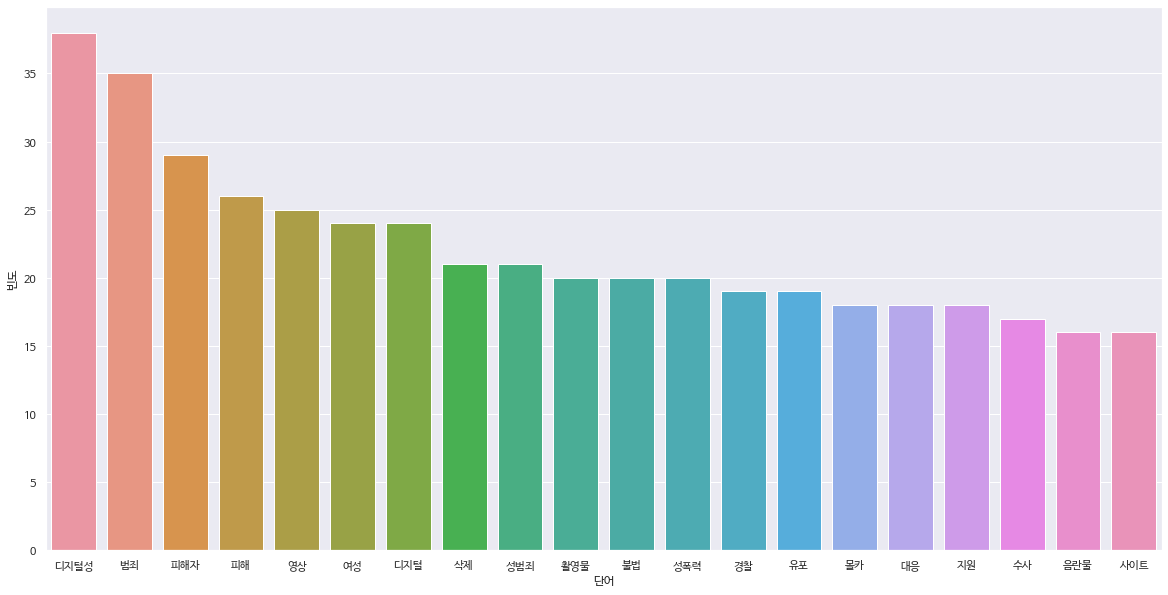

In [24]:
sns.barplot(x = '단어', y = '빈도', data=hani_word_df)

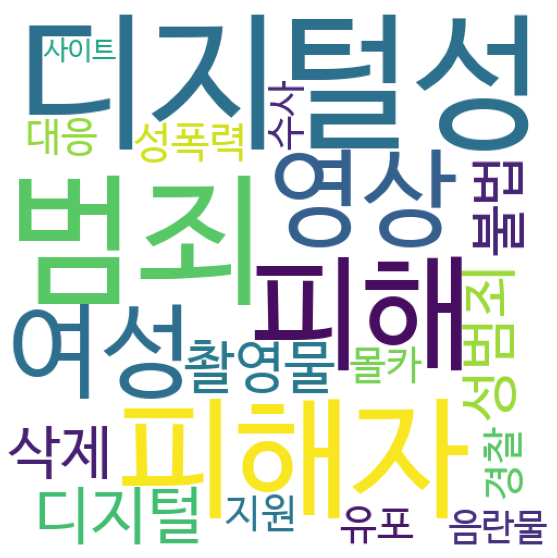

In [25]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(hani_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
hani_df[hani_df['키워드'].str.contains('몰카')]

,일자,언론사,제목,키워드,특성추출,본문
20,2017-06-26,한겨레,‘몰카 극성’ 불안한 여성들 “탐지기라도 쓸 수밖에…”,"몰카,극성,불안,여성들,탐지기,서울,연세대,재학중,학기,여학생회,카메라,탐지기,차례...","탐지기,경찰청,이씨,여자화장실,디에스오,임세연,온라인,여성들,관계자,사회단체,임소영...",서울 연세대에 재학중인 이아무개(21)씨는 이번 학기에만 총여학생회에서 몰래카메라 ...
32,2017-08-30,한겨레,"몰카, 국내 웹하드 업체부터 잡아라","몰카,업체,웹하드,디지털성,범죄아웃,DSO,활동가들,11월,웹하드,몰카,카메라,영상...","웹하드,서울,방통위,성폭력,음란물,활동가,활동가들,업체들,서승희,유통시장,누리집,디...",‘디지털성범죄아웃’(DSO) 활동가들은 지난해 11월부터 석달 간 국내 웹하드에 올...
37,2017-09-06,한겨레,수사기관만큼 방통위·방심위 역할 중요,"수사기관,방통위,방심위,역할,중요,한국사이버성폭력대응센터,한사성,활동가들,방송통신위...","웹하드,방통위,방심위,성범죄,활동가,음란물,영상물,한사,한사성,국정과제,불가능,전자지문",한국사이버성폭력대응센터(한사성) 활동가들은 최근 ‘방송통신위원회(방통위)의 힘’을 ...
38,2017-09-06,한겨레,"내 영상이 돌다니…“몰카, 지워도 지워도 끝나지 않는 지옥”","영상,몰카,지옥,피해자,가해자,몰카,리벤지,포르노,디지털,성범죄,피해자들,정신적,경...","ㄱ씨,피해자,ㄴ씨,성폭력,유포자,머릿속,피해자들,변호사,성범죄,벌금형,방심위,음란물...","피해자는 있는데, 가해자는 없다. ‘몰카’, ‘리벤지 포르노’ 등으로 불리는 ‘디지..."
39,2017-09-06,한겨레,내 ‘몰카 영상’ 발견했을 때 대처법,"몰카,영상,발견,대처법,피해자,디지털,성범죄,속도,생명,증거,수집,신고,가해자,신고...","성폭력,고객센터,피해자,경찰서,대표전화,여성가족부,유해정보,방송통신심의위원회,한국사...",디지털 성범죄 피해자가 됐다면 ‘빠르게’를 잊지 말아야 한다. 속도가 생명이다. 증...
40,2017-09-06,한겨레,불법영상 걸릴때 대처법까지 공유…법 조롱하는 유포자들,"불법영상,대처법,불법,영상,공유,조롱,유포자들,파일,순식간,복제,몰카,디지털,성범죄...","유포자,기소유예,벌금형,피해자,성범죄,음란물,페이스북,성폭력처벌법,200만,가해자,...","하나의 파일이 수백, 수천개로 순식간에 ‘복제’된다. ‘몰카’로 불려온 디지털 성범..."
41,2017-09-07,한겨레,“몰카 유포자도 성폭력범으로 처벌합시다”,"유포자,성폭력범,처벌,몰카,범죄,법적,대응,피해,구제,고강도,대책,마련,문재인,대통...","피해자,성폭력,성범죄,박정원,이남훈,피해자들,서승희,디지털성,하예,여성가족부,음란물",피해자 지원 단체 쪽에서 디지털성범죄 신고와 수사를 지원할 때 겪는 어려움이나 제...
42,2017-09-08,한겨레,[친기자] ‘음란물’이 아니라 ‘범죄물’입니다,"음란물,범죄물,지난달,회원,80여만,카페,남초,인터넷,설문조사,제목,야동,국산,유출...","피해자,야동,설문조사,성관계,범죄물,성범죄,서울여대,가해자,성폭력,성인물,한겨레,촬...","지난달 13일, 회원 수 80여만명의 남초 인터넷 카페에 한 설문조사가 만들어졌습니..."
43,2017-09-13,한겨레,몰카·리벤지포르노… 디지털 성범죄물 웹하드에서 자취 감춘다,"몰카,리벤지포르노,웹하드,디지털,성범죄,자취,사이트,웹하드,몰카,리벤지포르노,디지털...","클린센터,웹하드,촬영물,성범죄,피해자,네트워크협회,남희섭,김성이,변호사,디지털성폭력...","국내 웹하드 사이트에서 몰카, 리벤지포르노 등 디지털 성범죄물의 유통이 차단된다. ..."
46,2017-09-17,한겨레,"경찰, 200만명 가입한 ‘몰카’사이트 폐쇄하고 운영자 구속","경찰,200만,가입,몰카,사이트,폐쇄,운영자,구속,여성들,치마,다리,디지털성,범죄,...","누리집,재유포,성매매,운영자,촬영물,회원들,디지털성,서울지방경찰청,섹시걸,최씨,이씨...",여성들의 치마 속이나 다리 등을 몰래 찍은 ‘디지털성범죄’ 사진 5000여장을 인터...


In [ ]:
hani_df[hani_df['키워드'].str.contains('페미니스트')]

,일자,언론사,제목,키워드,특성추출,본문
23,2017-07-13,한겨레,“대한민국이 바로 페미니스트 양성소”,"대한민국,페미니스트,양성소,대한민국,페미니스트,고백,유숙열,이프북스,1만,5월,대한...","이프,한국,대한민국,신문사,페미니스트저널,60대,여성들,누리집,유숙열,조박선영,임명...","대한민국 페미니스트의 고백 유숙열 외/이프북스·1만3000원 1997년 5월, 대..."
106,2017-11-26,한겨레,[2030 잠금해제] 2017 ‘페미니즘 소설’ 박물지 / 오혜진,"소설,페미니즘,박물지,오혜진,오혜진,문화,연구자,전성시대,페미니즘,소설,전성,시대,...","성폭력,불균등,한국,책들,안도감,오혜진,김지영,여자들,현남,소설집,여성혐오,호전성,...",오혜진 문화연구자 바야흐로 “페미니즘 소설 전성시대”다. 30대 여성작가들이 주요...
340,2018-08-28,한겨레,[포토] “‘웹하드 카르텔’ 디지털성범죄 산업 특별수사하라”,"웹하드,카르텔,디지털성,범죄,산업,특별,수사,청와대,분수광장,청와대,분수,광장,10...","웹하드,청원,청와대,촬영물,전주,기자회견문,10여,특별수사,연구회,성범죄,성균관대,...",28일 12시께 갑작스레 비가 쏟아진 청와대 앞 분수광장. 10여 개 단체 회원들이...
687,2019-05-09,한겨레,대통령만 ‘페미니스트’ 주창…성평등 정책 의지는 안 보여,"대통령,페미니스트,주창,성평등,정책,의지,페미니스트,대통령,대통령,페미니스트,문재인...","성평등,성차별,성희롱,성폭력,여가부,미투,일자리,위원회,김영순,여연,양성평등위원회,...",“페미니스트 대통령이 되겠다”고 했다. “대통령만 ‘페미니스트’가 됐다”는 평이 나...


#경향신문

In [26]:
khan_df = text_df[text_df['언론사'].str.contains('경향신문')]
khan_df

,일자,언론사,제목,키워드,특성추출,본문
4,2017-03-07,경향신문,"데이트폭력 피해자 법률지원, '안심이' 앱 등…서울시, '여성안심특별시3.0 '발표","법률지원,데이트,폭력,피해자,법률,지원,안심이,서울시,여성안심특별시3.0,서울시,피...","데이트폭력,자치구,서울시,안심이,피해자,성평등,안심망,2기,감수성,3만,통합관제센터...",서울시가 데이트 폭력 피해자를 위한 무료 법률·의료지원을 시범 실시한다. 위험상황에...
16,2017-04-07,경향신문,"몰카 방지법 만들어야"" …시민 입법 제안""","몰카,방지법,제안,시민,입법,디지털성폭력대항단체,DSO,Digital,아웃,Sexu...","전문가,성폭력,dso,국회톡톡,영상들,인식개선,의무교육,sexual,화장실,샤워실,...",디지털성폭력대항단체인 ‘DSO(Digital Sexual Crime Out·디지털 ...
17,2017-04-10,경향신문,"막을 방법이요? 없죠."" 초소형 '몰카' 직접 사러 가보니""","방법,초소형,몰카,방법,세운상가,서울,종로구,폐쇄,CC,TV전문점,카메라,몰카,방법...","ㄴ전자,세운상가,성폭력,예린,자동차,음식점,전문점,용산,사람들,입간판,cctv,보조...",“방법이요? 없죠.” 서울 종로구 세운상가의 ㄱ 폐쇄회로(CC) TV전문점에서 몰래...
25,2017-07-23,경향신문,[미디어 세상]몰카를 음란물로 소비하는 사회의 문제,"몰카,음란물,소비,사회,공간,주간,인터넷,카메라,몰카,지인,연예인,합성사진,데이트,...","영상물,대상화,음란물,문제점,사회관계망서비스,웹사이트,선정성,화장실,특례법,수치심,...","최근 몇 주간 인터넷 공간은 몰래카메라(몰카)와 지인 혹은 연예인 합성사진, 데이트..."
34,2017-08-31,경향신문,여가부 “2022년까지 30대 여성고용률 63%로”,"여가부,63%,여성,고용,63%,노동부,공공부문,정규직화,로드맵,이달,보건복지부,고...","여가부,노동부,정규직화,공공부문,출산율,로드맵,인구비전,원씩,공공기관,국공립,근로시...",ㆍ노동부는 공공부문 정규직화 로드맵 이달 중 발표 보건복지부·고용노동부·여성가족부가...
57,2017-09-26,경향신문,"정부 “몰래카메라, 판매 단계부터 규제···가해자 처벌 ‘징역형’부터”","정부,카메라,판매,단계,규제,가해자,처벌,징역형,정부,몰카,범죄,예방,카메라,판매,...","성범죄,영상물,예방교육,가해자,징역형,원스톱,6단계,등록제,공무원,피해자",정부가 이른바 ’몰카’범죄를 예방하기 위해 ‘몰래카메라’를 판매 단계부..‘디지털성...
73,2017-10-05,경향신문,"[여성의 몸, 거래STOP①]디지털 성범죄, 돈줄을 끊어라","디지털,성범죄,돈줄,인터넷,기본정신,개방,공유,표현,자유,중시,무분별,범법행위,행동...","영상물,웹하드,성범죄,피해자,ㄴ씨,저작권,성산업,사업자,성매매,음란물,성매매업소,성...","“인터넷의 기본정신이 개방과 공유이고, 표현의 자유를 중시하다 보니 무분별하게 범법..."
76,2017-10-06,경향신문,"[여성의 몸, 거래STOP②]경찰이 본 디지털 성범죄…“3대 공급망 단속 주력하겠다”","경찰,디지털,성범죄,3대,주력,공급망,단속,범죄,입장,얼굴,9월,서울,서대문구,미근...","수사기관,소라넷,피해자,사람들,성매매,음란물,영상물,부다페스트,진행자,3대,운영자,...","“범죄 피의자들을 검거하면서 디지털성범죄 영상에 열광하는 오타쿠라고 해야 할까, 몰..."
77,2017-10-07,경향신문,"[여성의 몸, 거래STOP③] “피해자는 있고 가해자 없는 법 바꿔야”","피해자,가해자,정부,종합대책,디지털,성범죄,피해,예방,마련,개정,논의,디지털,성범죄...","성매매,피해자,성폭력,음란물,성범죄,변호사,연구위원,가해자,처벌법,수치심,특별법,성...",정부의 디지털 성범죄 피해 예방 종합대책이 마련되면서 관련 법 개정에 대한 논의도 ...
98,2017-11-12,경향신문,경찰노조 없이 강한 경찰 없다,"경찰노조,경찰,문재인,정부,경찰,모습,경찰,개혁의지,확인,핵심,가지,설립,경찰,노동...","경찰관,연구원,서울,경찰청,경찰서,경찰노조,세월호,공무원,ㄱ경사,경찰개혁위원회,위원...",문재인 정부 들어 경찰이 달라진 모습을 보이고 있다. 경찰의 진정한 개혁의지를 확인...


In [27]:
khan_cha_df = khan_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
khan_cha_df

,언론사,제목,키워드
0,경향신문,"데이트폭력 피해자 법률지원, '안심이' 앱 등…서울시, '여성안심특별시3.0 '발표","법률지원,데이트,폭력,피해자,법률,지원,안심이,서울시,여성안심특별시3.0,서울시,피..."
1,경향신문,"몰카 방지법 만들어야"" …시민 입법 제안""","몰카,방지법,제안,시민,입법,디지털성폭력대항단체,DSO,Digital,아웃,Sexu..."
2,경향신문,"막을 방법이요? 없죠."" 초소형 '몰카' 직접 사러 가보니""","방법,초소형,몰카,방법,세운상가,서울,종로구,폐쇄,CC,TV전문점,카메라,몰카,방법..."
3,경향신문,[미디어 세상]몰카를 음란물로 소비하는 사회의 문제,"몰카,음란물,소비,사회,공간,주간,인터넷,카메라,몰카,지인,연예인,합성사진,데이트,..."
4,경향신문,여가부 “2022년까지 30대 여성고용률 63%로”,"여가부,63%,여성,고용,63%,노동부,공공부문,정규직화,로드맵,이달,보건복지부,고..."
5,경향신문,"정부 “몰래카메라, 판매 단계부터 규제···가해자 처벌 ‘징역형’부터”","정부,카메라,판매,단계,규제,가해자,처벌,징역형,정부,몰카,범죄,예방,카메라,판매,..."
6,경향신문,"[여성의 몸, 거래STOP①]디지털 성범죄, 돈줄을 끊어라","디지털,성범죄,돈줄,인터넷,기본정신,개방,공유,표현,자유,중시,무분별,범법행위,행동..."
7,경향신문,"[여성의 몸, 거래STOP②]경찰이 본 디지털 성범죄…“3대 공급망 단속 주력하겠다”","경찰,디지털,성범죄,3대,주력,공급망,단속,범죄,입장,얼굴,9월,서울,서대문구,미근..."
8,경향신문,"[여성의 몸, 거래STOP③] “피해자는 있고 가해자 없는 법 바꿔야”","피해자,가해자,정부,종합대책,디지털,성범죄,피해,예방,마련,개정,논의,디지털,성범죄..."
9,경향신문,경찰노조 없이 강한 경찰 없다,"경찰노조,경찰,문재인,정부,경찰,모습,경찰,개혁의지,확인,핵심,가지,설립,경찰,노동..."


In [28]:
khan_cha_lis = khan_cha_df.values.tolist()
for i in range(len(khan_cha_lis)):
  khan_cha_lis[i].remove('경향신문')
  del khan_cha_lis[i][0]
khan_cha_lis

[['법률지원,데이트,폭력,피해자,법률,지원,안심이,서울시,여성안심특별시3.0,서울시,피해자,데이트,폭력,무료,법률,의료지원,시범,위험상황,신고,실행,SOS,호출,가능,안심이,4개,자치구,운영,시작,서울시,여성,하루,7일,2기,여성,안전,대책,여성,안심,특별시,3.0,서울시,지자체,민간단체,연계,데이트,폭력,피해자,무료법률,의료지원,시범,토대,2018년,전문지원기관,설치,계획,데이트폭력,실태조사,대책,장기,예방,지원,방안,마련,계획,여성,안심인프라,확대,방안,마련,스마트기술,CCTV,자치구,통합,관제,센터,안심망,연결,안심이,스마트,여성,안심망,App,4월,서비스,시작,위험감지시,실행,구조요청,통합관제센터,실시간,모니터링,위급,판단,경찰,현장,출동,4개,자치구,동작,성동,서대문,은평,가동,자치구,연내,내년,25개,자치구,확대,계획,대책,여성,안심,물리적,조성,사회,전반,성평등,가치,전파,여성혐오,문화,해소,주안점,특징,어린이집,아동,중학생,3만,대상,성인지,감수성,교육,조기,눈높이,시작,연내,국제기준,서울,성평등,교육,교재,교육,현장활동가,90명,확대,양성,방침,시청,부서,젠더담당자,정책,결정,평등,관점,반영,여성가족정책실장,엄규숙,서울시,여성,가족,정책,실장,그동안,여성안심택배,안심귀가스카우트,여성안심,조성,여성,혐오문화,데이트폭력,디지털성범죄,차단,생활,여성안전,생활,여성,안전,강화,계획,설명'],
 ['몰카,방지법,제안,시민,입법,디지털성폭력대항단체,DSO,Digital,아웃,Sexual,Crime,디지털,성폭력,카메라,판매,법안,제안,국회톡톡,7일,시민,입법,플랫폼,국회,톡톡,사이트,DSO,금지법안,몰카,판매,제안서,이날,8시,기준,제안,참여,DSO,워터파크,8월,몰카,사건,경찰,몰카,생산,소지,판매,판매,법안,신설,진행,법안,몰카,생산지,주목,소라넷,폐쇄,주변,몰카,해외사이트,국내싸이트,P2P,샤워실,화장실,일상생활,성행위,성관계,영상들,강간,디지털,성폭력,영상,실정,DSO,외국,전문가,허가,인물,판매,발전,허울,명분,피해자,현실,당장,불안,고통,DS

In [29]:
khan_key = []
khan_value = []
for i in range(len(khan_cha_lis)):
  for word in khan_cha_lis[i]:
      word = word.split(',')
      khan_key.append(word)
for j in khan_key:
  j = list(set(j))
  khan_value.append(j)
print(len(khan_value))

57


In [30]:
khan_words = {}
for k in range(len(khan_value)):
  for i in khan_value[k]:
      if i not in khan_words:
        khan_words[i] = 1
      elif i in khan_words:
        khan_words[i] += 1
print(khan_words)

{'전반': 3, '가치': 4, '교육': 9, 'CCTV': 3, '서울시': 3, '부서': 2, '폭력': 12, '관점': 6, '설명': 14, '토대': 2, '시범': 1, '90명': 1, '여성가족정책실장': 1, '여성안심택배': 1, '전문지원기관': 1, '무료법률': 1, '2기': 1, '스마트기술': 1, '경찰': 37, '장기': 2, '여성': 27, '피해자': 38, '연계': 7, '젠더담당자': 1, '스마트': 1, '계획': 15, '안심이': 1, '성인지': 3, '센터': 11, '주안점': 1, '3만': 4, '현장활동가': 1, '구조요청': 1, '중학생': 1, '양성': 1, '어린이집': 4, '사회': 18, '통합관제센터': 1, '성동': 1, '안전': 8, '통합': 1, '확대': 8, '현장': 6, '은평': 1, '국제기준': 1, '25개': 1, '호출': 1, '의료지원': 1, '4개': 1, '생활': 6, '관제': 1, '강화': 18, '데이트': 5, '법률': 11, '반영': 5, '대상': 22, '그동안': 5, '여성안심특별시3.0': 1, '문화': 9, '가족': 5, '위험상황': 1, '서대문': 1, '지자체': 1, '여성안전': 1, '연결': 2, '안심귀가스카우트': 1, '조성': 3, '3.0': 1, '내년': 2, '서비스': 10, '해소': 3, '엄규숙': 1, '판단': 10, '위험감지시': 1, '여성혐오': 4, '조기': 1, '성평등': 5, '눈높이': 2, '실행': 1, '모니터링': 7, '여성안심': 1, '하루': 6, '서울': 18, '법률지원': 2, '시청': 3, '디지털성범죄': 4, '실장': 1, '시작': 17, '가능': 10, '차단': 15, '가동': 1, '감수성': 4, '운영': 17, '정책': 10, '자치구': 1, '실시간': 4, '마련': 16, '특징': 4, '안심'

In [31]:
khan_word_df = pd.DataFrame(khan_words.items())
khan_word_df.columns = ['단어', '빈도']
khan_word_df = khan_word_df.sort_values(['빈도'],ascending = False)
khan_word_df = khan_word_df.head(20)
khan_word_df

,단어,빈도
200,범죄,47
231,디지털성,46
21,피해자,38
18,경찰,37
149,디지털,37
130,불법,34
258,성범죄,32
515,처벌,31
177,영상,31
163,성폭력,30


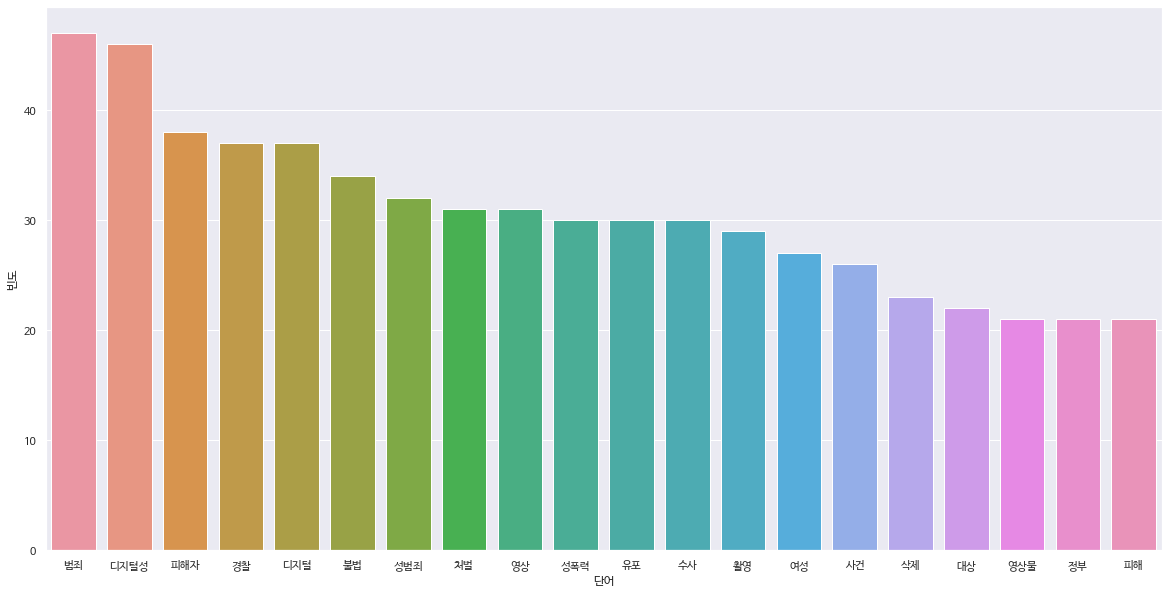

In [32]:
sns.barplot(x = '단어', y = '빈도', data=khan_word_df)

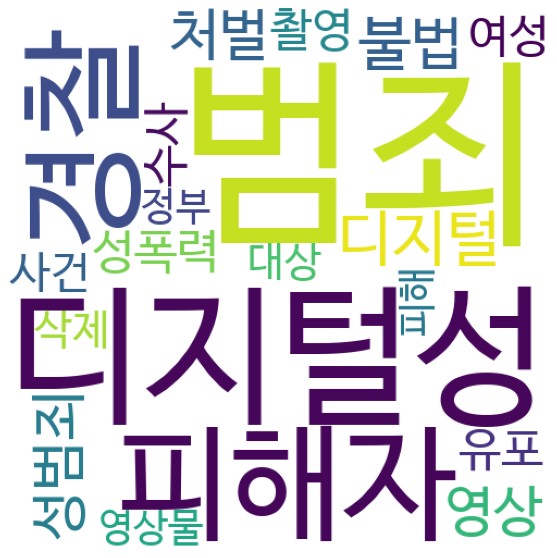

In [33]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(khan_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#아시아경제 & 머니투데이

In [34]:
asia_df = text_df[text_df['언론사'].str.contains('아시아경제')]
asia_df

,일자,언론사,제목,키워드,특성추출,본문
10,2017-03-07,아시아경제,"'여성안심특별시' 만든다…성평등 공감문화 확산""""","여성안심특별시,확산,성평등,공감,문화,서울시,8일,세계,여성,생활,여성,안심,특별시...","성평등,맞춤형,데이트폭력,피해자,감수성,체험프로그램,홍보물,선착순,어린이집,엄규숙,...","..디지털성범죄 등 여성혐오범죄 예방 및 피해자 구제 지원, 기존 여성안심 인프라 ..."
15,2017-04-05,아시아경제,여자친구 팬 사인회서 등장한 몰카…소속사 “멤버들 당혹…몰카 적발은 처음”,"여자친구,여자친구,사인회서,등장,몰카,소속사,멤버,당혹,몰카,적발,그룹,여자친구,사...","사인회,여자친구,예린,멤버들,벌금형,성범죄,소라넷,어웨이크닝,현행법,피해자,온라인,...",그룹 여자친구의 팬 사인회에 참석한 한 남성 팬이 몰래카메라를 사용해 아티스트를 촬...
63,2017-09-26,아시아경제,인터넷서 몰카 유통 규제…리벤지 포르노 처벌 강화,"인터넷,유통,규제,리벤지,강화,포르노,처벌,당정,마련,디지털,성범죄,피해,방지,대책...","성범죄,불법영상물,영상물,정책위의장,피해자,원스톱,변형카메라,더불어민주당,오현길,김...","당정, 디지털 성범죄 피해방..'몰카'를 이용한 성범죄를 줄이기 위해 인터넷에서 안..."
84,2017-10-16,아시아경제,"‘마녀의 법정’ 정려원,의견 대립 속 윤현민에 ‘정강이 킥’","마녀,법정,정려원,의견,대립,윤현민,대립,정강이,마녀,법정,정려원,윤현민,분노,정강...","진욱,여진욱,윤현민,마이듬,3회,2회,정려원,대립각,고속도로,본투비,2차,kbs2,...",‘마녀의 법정’ 정려원이 윤현민에게 분노의 정강이 킥을 날린다.KBS2 새 월화 드...
133,2018-01-25,아시아경제,[2018 업무보고] 성평등·돌봄육아 보장 확대,"성평등,육아,보장,확대,여성가족부,성평등,공정,안전,사회,동시,공공육아,강화,여성,...","성평등,일본군,피해자,여가부,공공부문,대응체계,공공기관,위안부,성희롱,고부가가치,정...",[아시아경제 조인경 기자] 여성가족부가 올 한해 성평등으로 공정하고 안..'부처별 ...
...,...,...,...,...,...,...
751,2019-07-19,아시아경제,"성폭력 무고 유죄 사례 6.4% 불과 무고 고소 남발""""","6.4%,성폭력,무고,유죄,사례,6.4%,고소,남발,성폭력,무고,고소,사례,유죄,확...","성폭력,제대로,한국여성정책연구원,피의자,가해자,피해자,대검찰청,범주화,권인숙,서울중...",[아시아경제 이현주 기자] 성폭력 무고로 고소된 사례 중 유죄로 확인된 것은 전체의...
757,2019-07-21,아시아경제,"경찰청·과기부, '과학치안 아이디어 공모전' 개최…9월16일까지 접수","경찰청,과기부,공모전,과학,치안,아이디어,개최,9월,접수,경찰청,과학기술정보통신부,...","공모전,과학치안,경찰관,경찰대학,경찰청,정보통신기술,치안력,문제제안,과학적,한국과학...",[아시아경제 이관주 기자] 경찰청과 과학기술정보통신부는 정보통신기술(ICT)을 활용...
770,2019-08-23,아시아경제,성폭력 신고되면 조사 결과 나오기 전에도 피해자 보호해야,"성폭력,신고,조사,결과,피해자,보호,성폭력,사건,발생,피해,신고,조사,결과,피해자,...","성폭력,미투,피해자,관계부처,여성가족부,미조치,성희롱,협의회,공공기관,디지털성,2차...",[아시아경제 이현주 기자] 성폭력 사건이 발생해 피해가 신고되면 조사 결과가 나오기...
777,2019-08-29,아시아경제,"[2020예산안]방통위 2099억원, 재난방송-개인정보활용 집중투입","방통위,재난방송,개인정보활용,집중투입,방송통신위원회,내년,2599억,예산,투입,재난...","방송통신,재난방송,방송광고,방송사,방통위,방송통신위원회,예산안,시청자,국제협력,사업...",[아시아경제 구채은 기자] 방송통신위원회는 내년에 2599억원의 예산을 투입해 재난...


In [35]:
asia_df[asia_df['키워드'].str.contains('여성가족부')]

,일자,언론사,제목,키워드,특성추출,본문
133,2018-01-25,아시아경제,[2018 업무보고] 성평등·돌봄육아 보장 확대,"성평등,육아,보장,확대,여성가족부,성평등,공정,안전,사회,동시,공공육아,강화,여성,...","성평등,일본군,피해자,여가부,공공부문,대응체계,공공기관,위안부,성희롱,고부가가치,정...",[아시아경제 조인경 기자] 여성가족부가 올 한해 성평등으로 공정하고 안..'부처별 ...
136,2018-01-26,아시아경제,[2018 업무보고] 성평등 인식 확산·공공 돌봄 확대(종합),"확산,성평등,인식,공공,확대,종합,피해자,여성가족부,업무,보고일본군,위안부,명예,존...","성평등,여가부,피해자,위안부,일본군,위기청소년,여성가족부,세대별,한부모,2배,공공부...",2018년 여성가족부 업무보고일본군 위안부 피해자의 명예와 존엄회복위기청소년 조기발...
154,2018-03-15,아시아경제,"“카톡 프사 삭제할까”…‘지인 능욕’ 극성, 가해자 퇴학도","삭제,카톡,프사,능욕,극성,가해자,퇴학도,여성,카카오톡,단톡방,사진,경악,사진,여성...","딥페이크,가해자,음란물,방심위,재학생,디지털성,피해자,성매매,지인능욕,텀블러,온라인...",‘지인능욕’ 디지털성범죄는 AI(인공지능) 기술을 통해서 합성 정도가 발전하고 있는...
193,2018-04-29,아시아경제,"디지털 성범죄 영상, 정부가 찾아서 삭제한다","영상,디지털,성범죄,정부,삭제,여가부,상담,수사,소송,피해자,종합,서비스,제공,아시...","성범죄,피해자,성폭력,여가부,불법영상물,영상물,피해자들,지원센터,그동안,방송통신심의...","여가부, 상담·수사·소송 등 피해자 위한 종합서비스 제공[아시아경제 조인경 기자] ..."
217,2018-06-04,아시아경제,"경찰, '불법촬영·유포' 집중단속…8월까지","경찰,불법촬영,유포,집중단속,8월,경찰,8월,전국,지방경찰청,경찰서,사이버,수사,인...","공급자,피해자,재유포,불법촬영물,디지털성,촬영물,증거자료,경찰서,방송통신심의위원회,...",[아시아경제 이관주 기자] 경찰은 오는 8월24일까지 전국 지방경찰청 및 경찰서 사...
226,2018-06-07,아시아경제,'몰카'·'불법 누드촬영' 근절 위해 민관 공조,"몰카,불법,누드촬영,근절,민관,공조,여가부,디지털,성범죄,민관,협의체,개최피해,방지...","종합대책,성범죄,법률안,영상물,피해자,불법영상물,여가부,웹하드,1만,변형카메라,협의...","..디지털성범죄대응팀'을 신설하고 긴급심의를 시행하고 있으며, 종합대책 실시 이후 ..."
233,2018-06-13,아시아경제,"동영상 제목에 '몰카', '국산', '국노' 필터링 강화","동영상,제목,몰카,국산,국노,필터링,강화,디지털성,범죄,영상물,하드,유통,차단,강화...","웹하드,영상물,디지털성,한국정보통신진흥협회,정부대책,방송통신위원회,여성가족부,관계부...",디지털성범죄 영상물웹하드 유통 차단 강화정부가 웹하드에서 유통되는 불법음란물에 대한...
238,2018-06-20,아시아경제,'불법촬영물 삭제비용 가해자에게 청구' 법제화,"가해자,불법,촬영물,삭제,비용,청구,법제화,성폭력방지,피해자보호,법률,시행,규칙,개...","피해자,성폭력,불법촬영물,개정안,구상권,상담원,여성가족부,시행규칙,가해자,성폭력방지...",'성폭력방지 및 피해자보호 등에 관한 법률 시행규칙' 개정안 입법예고[아시아경제 조...
270,2018-07-06,아시아경제,"여가부-방통위, '디지털 성범죄 영상물' 유통 막는다","여가부,방통위,영상물,디지털,성범죄,유통,영상물,웹하드,불법,촬영,사진,유통,차단,...","영상물,사업자,웹하드,성범죄,불법촬영물,정현백,방통위,한국정보통신진흥협회,웹하드상,...",".. 2859건의 디지털 성범죄 영상물을 삭제 조치했으며, 오는 9월4일까지 100..."
369,2018-09-27,아시아경제,"靑 디지털 성범죄자 1012명 검거…엄정 수사 방침""""","검거,디지털,성범죄자,수사,방침,청와대,영상물,불법,촬영,입장,처벌,강화,청와대,이...","청와대,불법촬영물,성범죄,숙박업소,피해자,불법촬영,사업자,방심위,촬영물,웹하드,해외...",[아시아경제 부애리 기자] 청와대가 27일 불법촬영 영상물에 대.. 여성가족부도 디...


In [36]:
money_df = text_df[text_df['언론사'].str.contains('머니투데이')]
money_df

,일자,언론사,제목,키워드,특성추출,본문
7,2017-03-07,머니투데이,'혐오문화·데이트폭력·디지털성범죄' 추방…서울시 생활속 성평등 확산,"혐오문화,데이트폭력,디지털성,범죄,추방,서울시,확산,생활속,성평등,서울시,혐오문화,...","성평등,서울시,자치구,데이트폭력,서울,감수성,안심망,피해자,여성안심,어린이집,고정관...",서울시가 혐오문화와 데이트폭력?디지털성범죄 등을 차단해 생활 속 여성 안전을 강화하...
28,2017-08-06,머니투데이,"전 남친이 내 영상을…"" 디지털성범죄 대처법""","남친,영상,디지털성,범죄,대처법,남자친구,동영상,인터넷,협박,친구들,남친,동영상,야...","피해자,피해자들,한사성,불가능,3개월,한사,경찰서,영상삭제,대행사,해결책,남친,트리...",전 남자친구가 동영상을 인터넷에 뿌리겠다고 협박합니다. 찍고 바로 지우겠다고 해서 ...
31,2017-08-29,머니투데이,[2018 예산안] 디지털성범죄 피해자 구제 예산 7억 신설,"디지털성,범죄,신설,피해자,구제,예산,7억,서울,뉴스1,윤다정,내년,디지털성,범죄,...","피해자,7억,예산안,피해구제,뉴스1,415억,이용시간,입원비,정부지원,9억,디지털성...",내년부터 디지털성범죄 피해자를 위한 상담과 동영상 삭제 등 피해구제에 새로 7억원이...
33,2017-08-31,머니투데이,아이돌보미 2000명 늘린다…몰카 방지대책 수립,"수립,아이돌보미,몰카,방지,대책,여성가족부,내년중,아이돌보미,2000명,2만,수준,...","성평등,여가부,아이돌보미,경력단절,피해자,유포자,가족친화제도,상반기,2만,관계부처,...",여성가족부가 내년중 '아이돌보미'를 2000명 늘려 2만3000명 수준으로 확대한다...
45,2017-09-14,머니투데이,9월~11월 ‘데이트폭력?사이버성폭력 근절 토크콘서트’ 개최된다,"9월,11월,데이트폭력,사이버성폭력,근절,토크,콘서트,개최,데이트폭력,사망사건,5년...","데이트폭력,사이버성폭력,한국여성의전화,전문가,서울시,성폭력,피해자,2부,당사자,경제...","데이트폭력으로 인한 사망사건이 최근 5년 간 매년 46건, 총 233건이 발생하는가..."
...,...,...,...,...,...,...
772,2019-08-26,머니투데이,"방심위, 디지털성범죄 대응 조직 신설","방심위,디지털성,범죄,신설,대응,조직,사진제공,방심위방송통신심의위원회,디지털성,범죄...","방심위,위원회,디지털성,피해자,심의소,방송심의소위원회,상품판매방송,최소화,소비자,방...",/사진제공=방심위방송통신심의위원회가 디지털성범죄정보에 신속하게 대응할 수 있는 조직...
773,2019-08-27,머니투데이,20대 그녀를 노리는 디지털성범죄,"20대,디지털성,범죄,여가부,지원센터,상반기,영상물,4.6,삭제,유포,불법촬영,한국...","영상물,삭제지원,피해자,여가부,지원센터,불법촬영물,여성가족부,상반기,4만,디지털성,...",[머니투데이 .. 여성가족부 산하 한국여성인권진흥원 디지털성범죄 피해자 지원센터 지...
785,2019-09-01,머니투데이,"방심위, 디지털성범죄 대응 전담조직 확대","방심위,디지털성,범죄,확대,대응,전담,조직,구축,디지털,성범죄,시간,대응체계,지식재...","디지털성,사무처,방심위,지식재산권,저작권,청소년보호팀,확산방지팀,불법촬영물,피해접수...",방송통신심의위원회(이하 방심위)가 디지털성범죄정보 대응 전담조직을 확대·신설한다....
787,2019-09-02,머니투데이,머니투데이 오프라인 헤드라인-2일자,"헤드라인,머니투데이,오프라인,2일자,종합,LGD,불화수소,국산,대체,삼성,삼성,이달...","삼성,신남방,산다,지자체,스마트공장,주도권,구입전,불화수소,8조,lcc,女力,철민이...","[머니투데이 조준영 기자] [종합] LGD, 불화수소 국산대체, 삼성 이달중 테스트..."


In [37]:
money_df[money_df['키워드'].str.contains('여성가족부')]

,일자,언론사,제목,키워드,특성추출,본문
28,2017-08-06,머니투데이,"전 남친이 내 영상을…"" 디지털성범죄 대처법""","남친,영상,디지털성,범죄,대처법,남자친구,동영상,인터넷,협박,친구들,남친,동영상,야...","피해자,피해자들,한사성,불가능,3개월,한사,경찰서,영상삭제,대행사,해결책,남친,트리...",전 남자친구가 동영상을 인터넷에 뿌리겠다고 협박합니다. 찍고 바로 지우겠다고 해서 ...
31,2017-08-29,머니투데이,[2018 예산안] 디지털성범죄 피해자 구제 예산 7억 신설,"디지털성,범죄,신설,피해자,구제,예산,7억,서울,뉴스1,윤다정,내년,디지털성,범죄,...","피해자,7억,예산안,피해구제,뉴스1,415억,이용시간,입원비,정부지원,9억,디지털성...",내년부터 디지털성범죄 피해자를 위한 상담과 동영상 삭제 등 피해구제에 새로 7억원이...
33,2017-08-31,머니투데이,아이돌보미 2000명 늘린다…몰카 방지대책 수립,"수립,아이돌보미,몰카,방지,대책,여성가족부,내년중,아이돌보미,2000명,2만,수준,...","성평등,여가부,아이돌보미,경력단절,피해자,유포자,가족친화제도,상반기,2만,관계부처,...",여성가족부가 내년중 '아이돌보미'를 2000명 늘려 2만3000명 수준으로 확대한다...
96,2017-11-06,머니투데이,"정현백 여가부장관 성평등 全사회에 뿌리내리도록 노력""""","성평등,정현백,여가부,장관,성평등,사회,노력,서울,뉴스1,윤다정,장관,정현백,여성가...","성평등,정현백,양육비,피해자,뉴스1,종합대책,위원회,맞춤형,공공부문,여가부,관계부처...",(서울=뉴스1) 윤다정 기자 = 정현백 여성가족부 장관은 6일 국회에서 열린 국회 ...
97,2017-11-10,머니투데이,"정현백 디지털성범죄 영상물 삭제 사업 민간에 맡기면 위험""""","정현백,디지털,범죄,영상물,삭제,사업,민간,위험,장관,정현백,여성가족부,정부,추진,...","영상물,위원장,정현백,성범죄,내년도,전체회의,기재부,김용진,남인순,여성가족부,피해자...",정현백 여성가족부 장관이 10일 정부가 추진하는 디지털 성범죄 관련 영상물 삭제 사...
123,2017-12-06,머니투데이,여가부 예산 7641억…디지털성범제 피해구제 예산 7억 신설,"7641억,여가부,예산,디지털성범제,피해,구제,예산,7억,신설,서울,뉴스1,윤다정,...","피해자,7641억,고용복지플러스센터,뉴스1,원씩,20억,시간당,예산안,윤다정,아이돌...",(서울=뉴스1) .. 디지털성범죄 피해자를 위한 상담과 동영상 삭제 등 피해구제 예...
134,2018-01-25,머니투데이,"성평등 실현해 공정하고 정의로운 사회를""…여가부 업무보고""","성평등,실현,공정,정의,사회,여가부,업무보고,서울,뉴스1,윤다정,여성가족부,25일,...","성평등,공공기관,피해자,공공부문,쉼터,여가부,성희롱,일본군,다국어,10대,4곳,온라...",(서울=뉴스1) 윤다정 기자 = 여성가족부는 25일 오후 정부서울청사에서 열린 20...
135,2018-01-26,머니투데이,"성평등 통해 일상속 민주주의 실현""…여가부 업무보고""","성평등,일상속,민주주,실현,여가부,업무보고,서울,뉴스1,윤다정,장관,정현백,여성가족...","성평등,아이돌보미,피해자,공공기관,정책과제,쉼터,성희롱,여가부,다국어,뉴스1,일본군...",(서울=뉴스1) 윤다정 기자 = 정현백 여성가족부 장관은 공정하고 정의로운 사회를 ...
145,2018-02-21,머니투데이,"'Me too' 확산에도 정부는 여전히 뒷북대응…효과도 의문""""","확산,정부,뒷북대응,효과,의문,서지현,검사,폭로,시작,미투,too·,운동,법조계,문...","여가부,성평등,피해자들,성폭력,미투,가해자,성추행,2차,연출가,성희롱,김씨,성평등교...",.. 교과목의 성평등 내용 강화 Δ교과서 성평등성 모니터링 강화 Δ성평등교육 표준매...
192,2018-04-29,머니투데이,'디지털 성범죄 피해자 지원센터' 개소…불법영상물 삭제 지원,"디지털,성범죄,피해자,지원,센터,개소,불법영상물,삭제,지원,여가부,30일,운영,시작...","여가부,성범죄,영상물,피해자들,지원센터,삭제지원,협의체,성폭력,불법촬영,수사지원,피...","[머니투데이 권혜민 기자] [여가부, 30일부터 운영 시작…상담·삭제지원·수사지원·..."


In [38]:
asia_cha_df = asia_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
asia_cha_df

,언론사,제목,키워드
0,아시아경제,"'여성안심특별시' 만든다…성평등 공감문화 확산""""","여성안심특별시,확산,성평등,공감,문화,서울시,8일,세계,여성,생활,여성,안심,특별시..."
1,아시아경제,여자친구 팬 사인회서 등장한 몰카…소속사 “멤버들 당혹…몰카 적발은 처음”,"여자친구,여자친구,사인회서,등장,몰카,소속사,멤버,당혹,몰카,적발,그룹,여자친구,사..."
2,아시아경제,인터넷서 몰카 유통 규제…리벤지 포르노 처벌 강화,"인터넷,유통,규제,리벤지,강화,포르노,처벌,당정,마련,디지털,성범죄,피해,방지,대책..."
3,아시아경제,"‘마녀의 법정’ 정려원,의견 대립 속 윤현민에 ‘정강이 킥’","마녀,법정,정려원,의견,대립,윤현민,대립,정강이,마녀,법정,정려원,윤현민,분노,정강..."
4,아시아경제,[2018 업무보고] 성평등·돌봄육아 보장 확대,"성평등,육아,보장,확대,여성가족부,성평등,공정,안전,사회,동시,공공육아,강화,여성,..."
...,...,...,...
89,아시아경제,"성폭력 무고 유죄 사례 6.4% 불과 무고 고소 남발""""","6.4%,성폭력,무고,유죄,사례,6.4%,고소,남발,성폭력,무고,고소,사례,유죄,확..."
90,아시아경제,"경찰청·과기부, '과학치안 아이디어 공모전' 개최…9월16일까지 접수","경찰청,과기부,공모전,과학,치안,아이디어,개최,9월,접수,경찰청,과학기술정보통신부,..."
91,아시아경제,성폭력 신고되면 조사 결과 나오기 전에도 피해자 보호해야,"성폭력,신고,조사,결과,피해자,보호,성폭력,사건,발생,피해,신고,조사,결과,피해자,..."
92,아시아경제,"[2020예산안]방통위 2099억원, 재난방송-개인정보활용 집중투입","방통위,재난방송,개인정보활용,집중투입,방송통신위원회,내년,2599억,예산,투입,재난..."


In [39]:
money_cha_df = money_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
money_cha_df

,언론사,제목,키워드
0,머니투데이,'혐오문화·데이트폭력·디지털성범죄' 추방…서울시 생활속 성평등 확산,"혐오문화,데이트폭력,디지털성,범죄,추방,서울시,확산,생활속,성평등,서울시,혐오문화,..."
1,머니투데이,"전 남친이 내 영상을…"" 디지털성범죄 대처법""","남친,영상,디지털성,범죄,대처법,남자친구,동영상,인터넷,협박,친구들,남친,동영상,야..."
2,머니투데이,[2018 예산안] 디지털성범죄 피해자 구제 예산 7억 신설,"디지털성,범죄,신설,피해자,구제,예산,7억,서울,뉴스1,윤다정,내년,디지털성,범죄,..."
3,머니투데이,아이돌보미 2000명 늘린다…몰카 방지대책 수립,"수립,아이돌보미,몰카,방지,대책,여성가족부,내년중,아이돌보미,2000명,2만,수준,..."
4,머니투데이,9월~11월 ‘데이트폭력?사이버성폭력 근절 토크콘서트’ 개최된다,"9월,11월,데이트폭력,사이버성폭력,근절,토크,콘서트,개최,데이트폭력,사망사건,5년..."
...,...,...,...
87,머니투데이,"방심위, 디지털성범죄 대응 조직 신설","방심위,디지털성,범죄,신설,대응,조직,사진제공,방심위방송통신심의위원회,디지털성,범죄..."
88,머니투데이,20대 그녀를 노리는 디지털성범죄,"20대,디지털성,범죄,여가부,지원센터,상반기,영상물,4.6,삭제,유포,불법촬영,한국..."
89,머니투데이,"방심위, 디지털성범죄 대응 전담조직 확대","방심위,디지털성,범죄,확대,대응,전담,조직,구축,디지털,성범죄,시간,대응체계,지식재..."
90,머니투데이,머니투데이 오프라인 헤드라인-2일자,"헤드라인,머니투데이,오프라인,2일자,종합,LGD,불화수소,국산,대체,삼성,삼성,이달..."


In [40]:
asia_cha_lis = asia_cha_df.values.tolist()
for i in range(len(asia_cha_lis)):
  asia_cha_lis[i].remove('아시아경제')
  del asia_cha_lis[i][0]
asia_cha_lis

[['여성안심특별시,확산,성평등,공감,문화,서울시,8일,세계,여성,생활,여성,안심,특별시,3.0,7일,여성안심특별시,3.0,3대,분야,사업,추진,확산,사회,전반,성평등,가치,데이트폭력,디지털성범죄,여성,혐오,범죄,예방,지원,피해자,구제,확대,여성,안심,인프라,강화,중점,어린이집,아동,중학생,3만,대상,성장,단계별,교육,맞춤형,성인지,감수성,향상,시작,어린이집,현장방문교육,초등학교,체험,교육,중학교,자유학기제,연계,토론식,인권,교육,예정,일터,지속가능,성평등,조직문화,지향,지원,지정,부서,젠더,위원회,여성,위원,비율,40%,위촉,수립,의무화,정책,계획,수립,젠더,자문관,협조,결재,직원,1만,대상,연중,감수성,교육,추진,일반기업,조성,성평등,조직문화,지원,촉진,직장맘지원센터,1개소,은평구,공사장,가림막,공공홍보물,여성혐오,성차별적,발견,차별,신고,홍보물,모니터링단,운영,공모전,성평등,UCC,캠페인,일상,성평등,의식,확산,계획,데이트폭력,디지털성,범죄,근절,집중,민간,전문,단체,선정,데이트폭력,디지털성,범죄,시범사업,피해,구제,전문기관,시작,효과,내년,전문,지원,기관,설치,검토,데이트폭력,디지털성,범죄,대응,매뉴얼,피해자용,경찰,지원자용,제작,상담시,활용,예정,애플리케이션,안심이,4개,자치구,본격적,가동,안심,스마트,폐쇄회로,CC,TV,적용,위험,상황,신고,SOS,호출,가능,14개,안심,확대,여성단체,아파트,부녀회,여성의용소방대,여성안전리더,매칭,교육,여성,안전,체험,교실,확대,운영,광나루,보라매,시민안전체험관,예비맘,초보맘,조부모,주부,임산부,교직원,교육교사,대상,맞춤형,시민,안전,체험프로그램,운영,엄규숙,여성가족정책실장,엄규숙,여성,가족,정책,실장,성평등,도시,여성,안전,도시,여성,안전,도시,안전,도시,기본,명제,성평등,공감,문화,확산,안전,도시,정책,총력,기회,저가매수,마지막,매수,클릭,종목,공개,제약바이오,신화,제2,성공,한미약품,발굴,무료공개,선착순,무료,공개,2017년,큰돈'],
 ['여자친구,여자친구,사인회서,등장,몰카,소속사,멤버,당혹,몰카,적발,그룹

In [41]:
asia_key = []
asia_value = []
for i in range(len(asia_cha_lis)):
  for word in asia_cha_lis[i]:
      word = word.split(',')
      asia_key.append(word)
for j in asia_key:
  j = list(set(j))
  asia_value.append(j)
print(len(asia_value))

94


In [42]:
asia_words = {}
for k in range(len(asia_value)):
  for i in asia_value[k]:
      if i not in asia_words:
        asia_words[i] = 1
      elif i in asia_words:
        asia_words[i] += 1
print(asia_words)

{'전반': 3, '가치': 1, '교육': 8, '대응': 22, '서울시': 4, '부서': 1, '여성단체': 13, '결재': 1, '8일': 6, 'CC': 3, '제작': 7, '교직원': 1, '마지막': 2, '매칭': 1, '여성가족정책실장': 1, '체험': 1, '위험': 4, '광나루': 1, '시범사업': 1, '경찰': 37, '디지털성': 79, '여성': 28, '모니터링단': 1, '피해자': 42, '교실': 1, '위원': 5, '연계': 12, '세계': 3, '자문관': 1, '매뉴얼': 2, '비율': 5, '전문기관': 1, '협조': 6, '기회': 4, '위원회': 9, '집중': 13, '스마트': 1, '직원': 6, '계획': 20, '주부': 1, '성인지': 1, '발견': 17, '직장맘지원센터': 1, '피해': 39, '젠더': 1, '공모전': 4, '안심이': 2, '맞춤형': 4, '상황': 19, '근절': 30, '지속가능': 1, '3만': 6, '기관': 14, '제2': 2, '중학생': 1, '기본': 2, '어린이집': 1, '사회': 19, '혐오': 4, '일상': 7, '차별': 7, '14개': 1, '검토': 4, '안전': 15, '확대': 17, '종목': 1, '초보맘': 1, '토론식': 1, 'TV': 4, '호출': 1, '한미약품': 1, '민간': 5, '중점': 7, '예비맘': 1, '아파트': 2, '향상': 3, '일터': 1, '4개': 2, '생활': 8, '피해자용': 1, '홍보물': 1, '효과': 5, '단계별': 3, '강화': 38, '시민안전체험관': 1, '체험프로그램': 1, '대상': 28, '중학교': 1, '조부모': 1, '가림막': 1, '시민': 4, '문화': 10, '가족': 8, '발굴': 5, '전문': 5, '공개': 17, '예정': 21, '부녀회': 1, '조성': 9, '3.0': 1, '자유학기제': 1, 

In [43]:
asia_word_df = pd.DataFrame(asia_words.items())
asia_word_df.columns = ['단어', '빈도']
asia_word_df = asia_word_df.sort_values(['빈도'],ascending = False)
asia_word_df = asia_word_df.head(20)
asia_word_df

,단어,빈도
141,범죄,79
20,디지털성,79
269,불법,48
223,성범죄,46
329,디지털,42
23,피해자,42
244,유포,40
43,피해,39
416,정부,38
83,강화,38


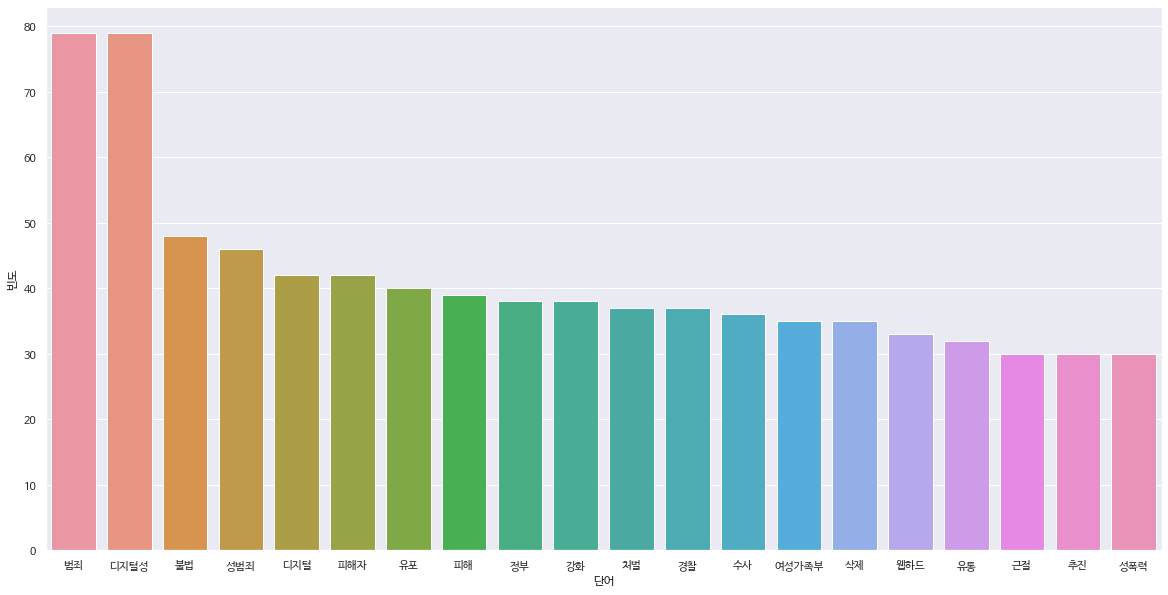

In [44]:
sns.barplot(x = '단어', y = '빈도', data=asia_word_df)

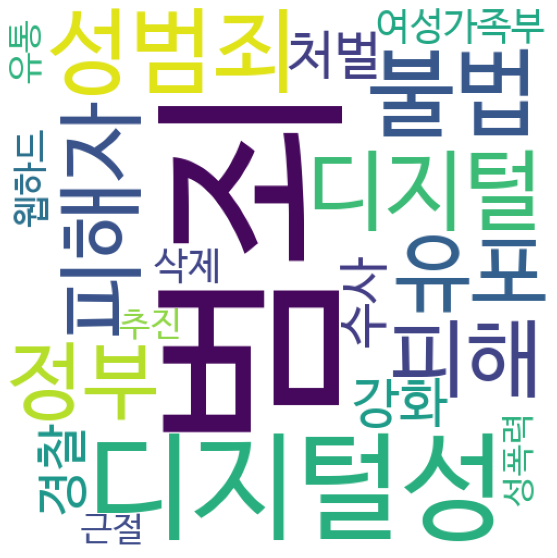

In [45]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(asia_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [46]:
money_cha_lis = money_cha_df.values.tolist()
for i in range(len(money_cha_lis)):
  money_cha_lis[i].remove('머니투데이')
  del money_cha_lis[i][0]
money_cha_lis

[['혐오문화,데이트폭력,디지털성,범죄,추방,서울시,확산,생활속,성평등,서울시,혐오문화,데이트폭력,디지털성범죄,차단,생활,생활,여성,안전,강화,방향,여성안전정책,추진,서울시,그동안,여성,안심택배,안심귀가스카우트,여성안심,선도적,조성,주목,서울시,세계,여성,3월,대책,여성,안심,특별시,3.0,성평등,가치,일상생활,교육,현장,일터,조직,문화,여성안심도시,실현,7일,대책,여성,안심,특별시,3.0,3대,분야,사업,추진,3대,분야,확산,사회,전반,성평등,가치,평등서울,데이트폭력,디지털성범죄,여성,혐오,범죄,예방,지원,피해자,구제,존중서울,확대,여성,안심,인프라,강화,안전서울,구성,여성살인사건,5월,강남역,인근,화장실,여성,살인,사건,여성혐오,공론화,사회통합,차원,평등,Gender,Equality,가치,생활,확산,해소,계획,추진,여성안심대책,내실,고도화,여성,안전,강화,총력,계획,학교,평등,세상,슬로건,인성,형성,어린이집,아동,중학생,3만,대상,성인지,감수성,향상,조기,눈높이,교육,시작,어린이집,현장방문교육,초등학교,체험,교육,중학교,자유학기제,연계,토론식,인권,교육,연내,유네스코,국제기준,서울,성평등,교육,교재,성평등,교육,현장,활동가,추가,90명,확대,양성,어른들,성차별,의식,성별,고정관념,아이,답습,가능성,만큼,교사,학부모,7000명,강화,교육,진행,직장,성평등,조직문화,서울시,선도적,일반,기업,확산,유도,부서,젠더담당자,지정,운영,시정,전반,감수성,산하,위원회,비율,여성,위원,연내,40%,홍보물,심의,위원회,젠더전문가,선임,직장맘지원센터,2개,2018년,2개소,권역별,추가,확충,일상,성평등,의식,자연,확산,성평등,이미지,이모티콘,제작,카카오톡,무료,앞치마,집안일,남자,스포츠카,장난감,여자아이,정형화,성역할,고정관념,이미지,예정,데이트폭력,디지털성,범죄,근절,집중,지자체,민간단체,연계,피해,구제,사각지대,피해자,무료,법률,의료지원,시범,오리엔테이션,대학교,신입생,예방교육,학생회,연계,프랜차이즈,커피전문점,협약,데이트폭력,디지털성,범죄,추방,캠페인,추진,역량,집중,계

In [47]:
money_key = []
money_value = []
for i in range(len(money_cha_lis)):
  for word in money_cha_lis[i]:
      word = word.split(',')
      money_key.append(word)
for j in money_key:
  j = list(set(j))
  money_value.append(j)
print(len(money_value))

92


In [48]:
money_words = {}
for k in range(len(money_value)):
  for i in money_value[k]:
      if i not in money_words:
        money_words[i] = 1
      elif i in money_words:
        money_words[i] += 1
print(money_words)

{'전반': 6, '가치': 3, '교육': 15, '평등서울': 1, 'CCTV': 1, '서울시': 5, '부서': 4, '제작': 13, '답습': 1, '실현': 6, '90명': 1, '시범': 2, '차원': 16, '여성가족정책실장': 2, '체험': 2, '활동가': 2, '생활속': 1, '내실': 1, '시범사업': 1, '스마트기술': 1, '대응력': 2, '디지털성': 77, '여성': 33, '피해자': 54, '위원': 4, '연계': 13, '세계': 3, '여성안심인프라': 1, '젠더담당자': 1, '추가': 13, 'Gender': 1, '비율': 14, '전문기관': 2, '긍정적': 1, '일상생활': 4, '위원회': 21, '집안일': 1, '집중': 15, '스마트': 2, '계획': 33, '제도화': 1, '성인지': 1, '안심이': 1, '직장맘지원센터': 1, '피해': 47, '센터': 14, '평가': 5, '여성들': 7, 'kennyb': 2, '형성': 3, '근절': 21, '3만': 7, '기관': 15, '중학생': 1, '양성': 6, '권역별': 1, '어린이집': 2, '사회': 28, '화장실': 4, '혐오': 6, '고도화': 2, '일상': 7, '효과분석': 1, '만큼': 8, '안전': 13, '통합': 7, '확대': 30, '검토': 9, '기업': 9, '현장': 6, '국제기준': 1, '25개': 1, '여성안심대책': 1, '토론식': 1, '민간': 12, '여성안심도시': 1, '일터': 3, '향상': 4, '산하': 10, '정형화': 1, '의료지원': 2, '4개': 7, '역량': 2, '생활': 8, '3월': 9, '공론화': 1, '홍보물': 1, '협약': 2, '관제': 1, '강화': 34, '사각지대': 7, '예방교육': 3, '카카오톡': 5, '주목': 6, '어른들': 1, '법률': 23, '학생회': 1, '추방': 2, '여성안전

In [49]:
money_word_df = pd.DataFrame(money_words.items())
money_word_df.columns = ['단어', '빈도']
money_word_df = money_word_df.sort_values(['빈도'],ascending = False)
money_word_df = money_word_df.head(20)
money_word_df

,단어,빈도
21,디지털성,77
188,범죄,75
548,불법,54
23,피해자,54
334,디지털,52
44,피해,47
509,성범죄,45
302,정부,41
300,여성가족부,39
218,지원,38


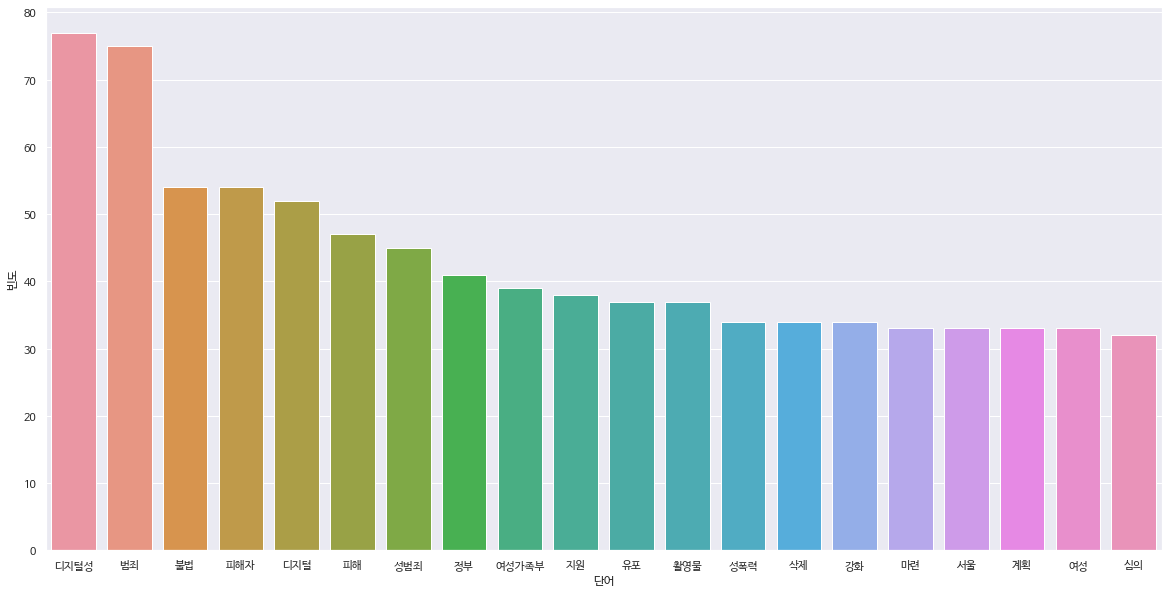

In [50]:
sns.barplot(x = '단어', y = '빈도', data=money_word_df)

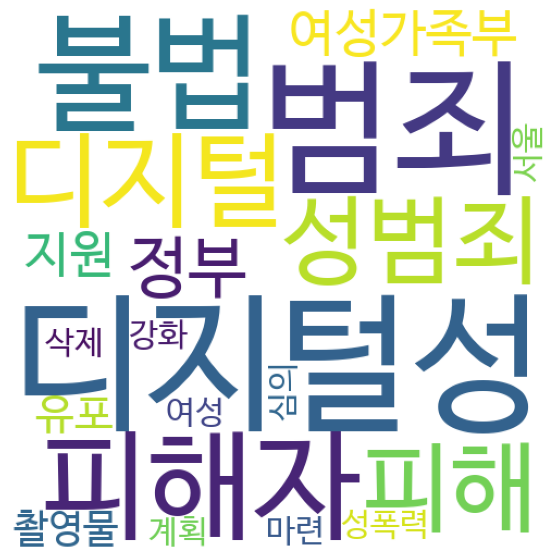

In [51]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(money_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#중앙일보

In [52]:
ang_df = text_df[text_df['언론사'].str.contains('중앙일보')]
ang_df

,일자,언론사,제목,키워드,특성추출,본문
131,2018-01-25,중앙일보,"여가부 업무보고, 성평등 실현·공정하고 정의로운 사회로","여가부,업무보고,성평등,실현,공정,정의,사회로,여성가족부,25일,정부서울청사,정부,...","성평등,공공부문,공공기관,쉼터,성희롱,다국어,4곳,일자리,원스톱,고부가가치,외국인,...",여성가족부는 25일 오후 정부서울청사에서 열린 2018년 정부업무보고에서 “성평등 ...
188,2018-04-12,중앙일보,[인사] 국방부 外,"국방부,국방부,과장급,이은영,국방,정책실,정책기획관실,정신,전력,문화,정책,과장,서...","팀장,담당관,서기관,정책기획관실,구진욱,과장급,장선정,박종현,김성훈,기획관실,정보화...",..▶ 종편보도채널팀장 구진욱▶전문편성채널팀장 서정배▶방송광고팀장 양귀미▶법질서보호...
209,2018-05-21,중앙일보,"靑, 청원 답변 “몰카범죄, 여성이 체감하는 불공정 시정되게 노력할 것”","몰카범죄,청원,답변,몰카,범죄,여성,체감,불공정,시정,노력,청와대,몰카,범죄,처벌,...","청원,여성들,영상물,몰카범죄,피해자,등록제,1만,2차,징역형,40만,포토라인,청와대...",청와대는 21일 ‘몰카범죄 처벌 강화’ 청원과 ‘성별 관계없는 국가의 보호를 요청....
214,2018-06-02,중앙일보,누가 요새 안경몰카 삽니까… 생수통 몰카,"청와대, 서울경찰청, 의위원회, 건국대, 옥션, 경찰청, 여성가족부, 한국사이버성폭...","요새,안경몰카,생수,몰카,25만,기록,휴대폰,케이스,명함지갑,지하철,지난달,서울,용...","여성들,청와대,영상물,청원,등록제,판매량,탐지기,명함지갑,안전관리법"
220,2018-06-04,중앙일보,"경찰, 3개월 간 불법촬영물 공급·유포·소비자 전방위 단속","경찰,3개월,3개월,불법촬영물,공급,유포,소비자,방위,단속,불법촬영물,몰카,사회,불...","불법촬영물,피해자,음란물,재유포,불안감,공급자,소비자,수사팀,2차,사이버안전국,경찰...",최근 불법촬영물(몰카)에 대한 사회적 불안감이 확산되자 경찰이 불법촬영물 공급자 및...
224,2018-06-07,중앙일보,"자기 스스로 찍은 촬영물이라도 본인 동의 없이 유포하면 처벌""""","스스로,촬영물,본인,동의,유포,처벌,스스로,촬영,사진,영상,본인,동의,사람,유포,처...","영상물,성범죄,여성가족부,종합대책,피해자,촬영물,1만,웹하드,불가능,법률안,성폭력,...",앞으로 자기 스스로 촬영한 사진·영상이라도 본인 동의 없이 다른 사람이 유포하면 처...
229,2018-06-11,중앙일보,정현백 “홍대 불법 촬영 사건으로 억눌렸던 여성 분노 폭발”,"사건,정현백,홍대,불법,촬영,폭발,여성,분노,홍대,불법,촬영,사건,계기,혜화역,불법...","불법촬영,여성들,혜화역,성범죄,여가부,여성가족부,정현백,홍대,편파수사,범정부,규탄시...",‘홍대 불법 촬영 사건’을 계기로 이어진 혜화역 불법촬영 편파 수사 규탄 시위와 관...
239,2018-06-20,중앙일보,9월부터 '불법촬영물 삭제 비용’ 피해자가 안낸다,"9월,비용,불법,촬영물,삭제,피해자,9월,카메라,촬영,불법,촬영물,온라인,유포,국가...","불법촬영물,피해자,시행규칙,성폭력,구상권,여성가족부,가해자,개정안,온라인,최창행,행...",9월부터 몰래카메라 등으로 촬영한 불법 촬영물이 온라인 상에 유포된 경우 국가가 삭...
242,2018-06-21,중앙일보,"디지털 성범죄 가해자, 4명 중 3명은 전 연인 등 지인","가해자,디지털,성범죄,4명,3명,연인,지인,디지털,성범죄,피해자,지원,센터,신고,디...","피해자,성범죄,불법촬영,성인사이트,웹하드,3명,292건,지원센터,4명,보고서,여성가...",'디지털 성범죄 피해자 지원센터'에 신고를 된 디지털 성범죄의 가해자 4명 중 3명...
252,2018-06-26,중앙일보,진화하는 초소형 카메라 공포 … 여성들 ‘몰카 찌르개’ 소지하기도,"진화,공포,초소형,카메라,찌르개,여성들,몰카,소지,몰카,악용,초소형,카메라,렌즈,1...","촬영물,온라인,등록제,피해자,유포자,여성들,인터넷쇼핑몰,용산,건국대,서울,윤지영,몰...",몰카로 악용되는 초소형 카메라(렌즈 1mm)는 ‘진화’하고 있다. 구하기도 쉽다. ...


In [53]:
ang_cha_df = ang_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
ang_cha_df = ang_cha_df.drop(index = [1])
ang_cha_df

,언론사,제목,키워드
0,중앙일보,"여가부 업무보고, 성평등 실현·공정하고 정의로운 사회로","여가부,업무보고,성평등,실현,공정,정의,사회로,여성가족부,25일,정부서울청사,정부,..."
2,중앙일보,"靑, 청원 답변 “몰카범죄, 여성이 체감하는 불공정 시정되게 노력할 것”","몰카범죄,청원,답변,몰카,범죄,여성,체감,불공정,시정,노력,청와대,몰카,범죄,처벌,..."
3,중앙일보,누가 요새 안경몰카 삽니까… 생수통 몰카,"청와대, 서울경찰청, 의위원회, 건국대, 옥션, 경찰청, 여성가족부, 한국사이버성폭..."
4,중앙일보,"경찰, 3개월 간 불법촬영물 공급·유포·소비자 전방위 단속","경찰,3개월,3개월,불법촬영물,공급,유포,소비자,방위,단속,불법촬영물,몰카,사회,불..."
5,중앙일보,"자기 스스로 찍은 촬영물이라도 본인 동의 없이 유포하면 처벌""""","스스로,촬영물,본인,동의,유포,처벌,스스로,촬영,사진,영상,본인,동의,사람,유포,처..."
6,중앙일보,정현백 “홍대 불법 촬영 사건으로 억눌렸던 여성 분노 폭발”,"사건,정현백,홍대,불법,촬영,폭발,여성,분노,홍대,불법,촬영,사건,계기,혜화역,불법..."
7,중앙일보,9월부터 '불법촬영물 삭제 비용’ 피해자가 안낸다,"9월,비용,불법,촬영물,삭제,피해자,9월,카메라,촬영,불법,촬영물,온라인,유포,국가..."
8,중앙일보,"디지털 성범죄 가해자, 4명 중 3명은 전 연인 등 지인","가해자,디지털,성범죄,4명,3명,연인,지인,디지털,성범죄,피해자,지원,센터,신고,디..."
9,중앙일보,진화하는 초소형 카메라 공포 … 여성들 ‘몰카 찌르개’ 소지하기도,"진화,공포,초소형,카메라,찌르개,여성들,몰카,소지,몰카,악용,초소형,카메라,렌즈,1..."
10,중앙일보,디지털성범죄 영상물 4548건 적발…헤비 업로더는 수사의뢰,"디지털성,범죄,적발,영상물,헤비,업로더,수사의뢰,방송통신위원회,온라인,유포,공유,디..."


In [54]:
ang_cha_lis = ang_cha_df.values.tolist()
for i in range(len(ang_cha_lis)):
  ang_cha_lis[i].remove('중앙일보')
  del ang_cha_lis[i][0]
ang_cha_lis

[['여가부,업무보고,성평등,실현,공정,정의,사회로,여성가족부,25일,정부서울청사,정부,업무,보고,성평등,실현,공정,정의,사회,개선,성평등,인식,여성,일자리,위기,청소년,보호,3개,정책,추진,여가부,목표제,공공기관,여성,임원,공공부문,여성,대표,성별,임금격차,차별,고용,환경,개선,5000여,국가기관,지방자치단체,공공기관,공공부문,특별,전수조사,실태,직장,성희롱,진단,방지조치,모니터링,디지털성,범죄,피해자,상담,수사,삭제,소송지원,사후,모니터링,원스톱,종합,서비스,지원,폭력,피해,결혼이주여성,쉼터,종전,26곳,28곳,확대,여부,외국인,등록,입소,서비스,다국어,전화,상담,다누리콜센터,시간,운영,긴급구출,보호시설,연계,더불어,공공성,강화,여성,사회,아이,서비스,확대,서비스,제공,공동육아,확대,운영,여성,중장년,여성,세대별,정책,여성,일자리,강화,고부가가치,직종,훈련,경력단절예방,프로그램,지원,위기,청소년,보호,가족,방안,추진,청소년,쉼터,지원,위기,청소년,인프라,확충,한편,쉼터,퇴소,청소년,주거,자립,지원,강화,청소년,자립,지원관,4곳,지원,한부모,가족,양육부담,자녀양육비,정부지원,확대,가정폭력,위기가족,조기,발견,긴급돌봄,가족상담,가족,특성,맞춤형,서비스,사후관리,제공'],
 ['몰카범죄,청원,답변,몰카,범죄,여성,체감,불공정,시정,노력,청와대,몰카,범죄,처벌,강화,청원,성별,국가,보호,요청,합정,불법,누드,촬영,청원,답변,공개,답변,마감,강화,몰카,범죄,처벌,청원,사건,홍대,몰카,동일,범죄,동일,처벌,이슈,여성들,관심,성별,국가,보호,요청,청원,열흘,40만,참여,청원,피팅,모델,불법,누드,촬영,18만,지지,답변,대상,포함,청원,장관,정현백,여성가족부,이철성,경찰청장,공동,답변자,청장,여성,대한민국,국민,성별,국가,보호,요청,청원,동의,일주일,40만,상황,자체,경찰,수장,책임감,그동안,불안,상처,여성들,마음,청장,사건,홍대,몰카,제한,공간,20여명,수사,신속,진행,성별,수사,여성들,체감,불공정,시정,노력,청장,피의자,포토라인,비판,경찰,포토라인,영장실질심사,법원,

In [55]:
ang_key = []
ang_value = []
for i in range(len(ang_cha_lis)):
  for word in ang_cha_lis[i]:
      word = word.split(',')
      ang_key.append(word)
for j in ang_key:
  j = list(set(j))
  ang_value.append(j)
print(len(ang_value))

25


In [56]:
ang_words = {}
for k in range(len(ang_value)):
  for i in ang_value[k]:
      if i not in ang_words:
        ang_words[i] = 1
      elif i in ang_words:
        ang_words[i] += 1
print(ang_words)

{'보고': 2, '폭력': 4, '3개': 2, '국가기관': 1, '임원': 3, '대표': 2, '실현': 1, '한편': 2, '위기가족': 1, '특성': 1, '상담': 5, '디지털성': 18, '쉼터': 1, '여성': 10, '피해자': 17, '여부': 5, '연계': 3, '업무': 1, '발견': 3, '피해': 13, '사후': 3, '25일': 1, '맞춤형': 2, '경력단절예방': 1, '훈련': 1, '양육부담': 1, '정부지원': 1, '사회': 6, '공공기관': 2, '정부서울청사': 1, '차별': 3, '직종': 1, '주거': 2, '확대': 2, '한부모': 1, '자립': 1, '입소': 1, '전화': 4, '원스톱': 3, '목표제': 1, '자녀양육비': 1, '종합': 6, '강화': 9, '임금격차': 1, '실태': 1, '가족': 1, '다누리콜센터': 1, '수사': 18, '위기': 1, '개선': 3, '확충': 1, '서비스': 5, '고용': 1, '공정': 2, '시간': 2, '5000여': 1, '소송지원': 1, '성평등': 1, '조기': 1, '성별': 3, '아이': 1, '가족상담': 1, '여성가족부': 12, '모니터링': 5, '정부': 10, '환경': 2, '제공': 3, '성희롱': 1, '인프라': 1, '4곳': 1, '정의': 1, '직장': 1, '삭제': 15, '정책': 1, '운영': 5, '긴급구출': 1, '지방자치단체': 1, '업무보고': 1, '진단': 1, '범죄': 21, '퇴소': 1, '보호시설': 1, '등록': 4, '중장년': 1, '보호': 8, '공공성': 1, '고부가가치': 1, '방지조치': 1, '결혼이주여성': 1, '특별': 2, '가정폭력': 1, '다국어': 1, '공동육아': 1, '종전': 1, '긴급돌봄': 1, '여가부': 8, '외국인': 1, '프로그램': 4, '사회로': 1, '방안': 4, '사후관리'

In [57]:
ang_word_df = pd.DataFrame(ang_words.items())
ang_word_df.columns = ['단어', '빈도']
ang_word_df = ang_word_df.sort_values(['빈도'],ascending = False)
ang_word_df = ang_word_df.head(20)
ang_word_df

,단어,빈도
79,범죄,21
47,수사,18
314,디지털,18
11,디지털성,18
14,피해자,17
240,불법,16
348,촬영,16
207,유포,16
179,성범죄,15
72,삭제,15


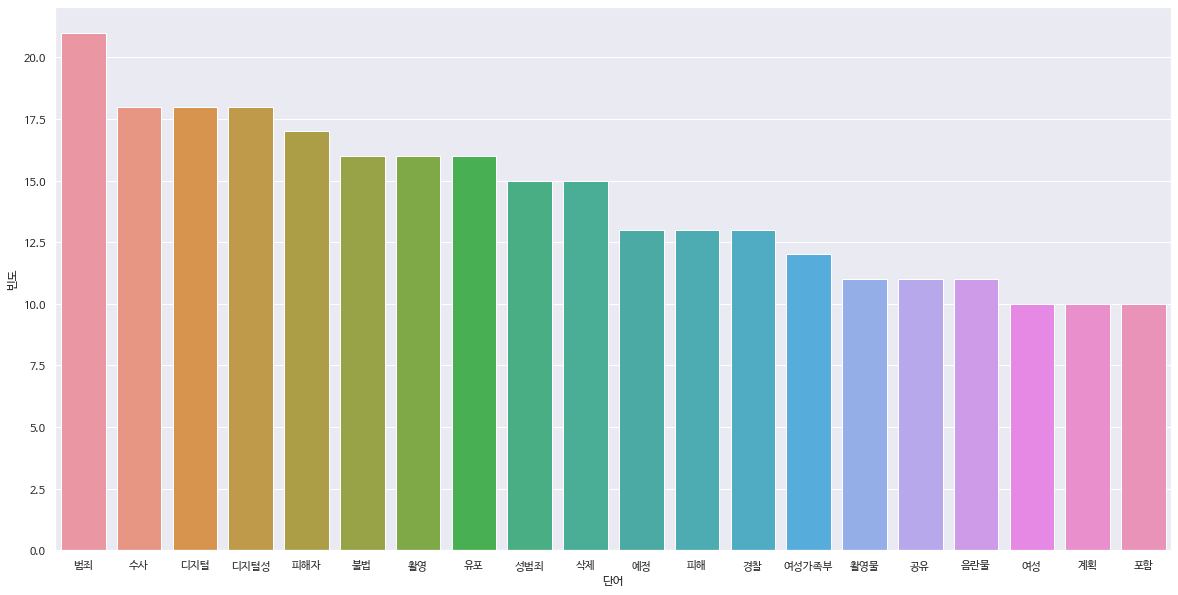

In [58]:
sns.barplot(x = '단어', y = '빈도', data=ang_word_df)

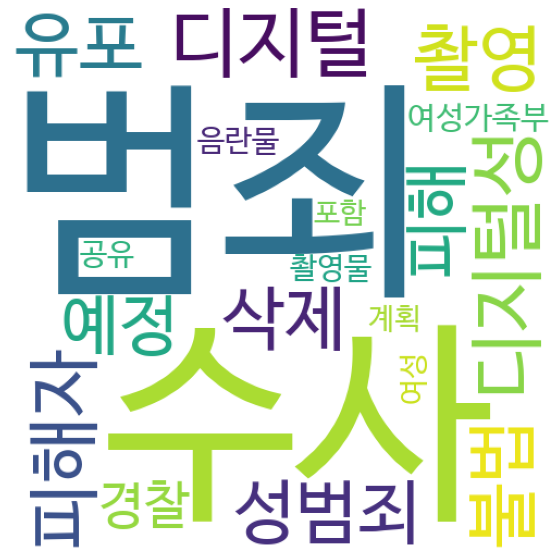

In [59]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(ang_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#동아일보

In [60]:
donga_df = text_df[text_df['언론사'].str.contains('동아일보')]
donga_df

,일자,언론사,제목,키워드,특성추출,본문
158,2018-03-16,동아일보,4기 방심위 “공익-공정 앞세워 시청자 권익 보호”,"공익,4기,방심위,공정,보호,시청자,권익,방송통신,심의,기본,원칙,공익,공정,보장,...","방심위,위원장,1인,조직개편안,미투,시청자,심영섭,박상수,중구,기자간담회,서울,성범...",“방송통신 심의의 기본 원칙을 ‘공익과 공정’ ‘시청자 권익 보장’ ‘신속 처리 대...
182,2018-04-12,동아일보,[인사]행정안전부 外,"행정안전부,행정,안전부,상황,총괄,담당관,김영훈,안전,사업,조정,과장,이명수,승강기...","직무대리,네트워크,박종현,팀장,문연주,추재,유석근,이은경,이용배,이명수,tv,김지회...",◇행정안전부 △상황총괄담당관 김영훈 △안전사업조정과장 이명수 △승강기안전〃 박종현 ...
262,2018-06-29,동아일보,주 52시간 근로 시행… 책값-공연관람비 최대 100만원 소득공제,"시행,시간,근로,책값,공연관람비,최대,소득공제,1일,1일,기업,규모,근로자들,주당,...","근로자,6개월,20만,자동차,사업장,보험료,공연관람비,500만,저소득,가입자,운전자...",다음 달 1일부터 300인 이상 규모 기업에 다니는 근로자들의 주당 근무 시간이 최...
279,2018-07-19,동아일보,“중국어가 들리는데?”…음란물과 사투 ‘디지털성범죄대응팀’,"중국어,음란물,사투,디지털,범죄대응팀,중국어,3초,사무실,서울,양천구,방송통신심의위...","방심위,성범죄물,피해자,팀원들,성관계,음란물,성범죄,직원들,6개월,워마드,음란사이트...",“중국어가 들리는데?” “3초 뒤로 돌려봐요” 17일 서울 양천구 방송통신심의위...
303,2018-08-01,동아일보,"방통위, 웹하드에 음란물 상습 유포 ID 297개 수사의뢰","방통위,웹하드,음란물,상습,유포,ID,수사의뢰,방송통신위원회,웹하드,디지털,성범죄,...","웹하드,영상물,음란물,사업자,수사의뢰,비공개,방통위,성범죄,기간통신사업자들,집중점검...",방송통신위원회가 웹하드를 통해 디지털 성범죄 영상물 2848건을 상습적으로 유통시킨...
424,2018-10-31,동아일보,"“첫 번째 영상만큼 잔인”…셜록, 양진호 회장 두 번째 영상 공개 예고","번째,잔인,셜록,양진호,회장,번째,영상,공개,예고,웹하드,업체,위디스크,파일노리,실...","양진호,위디스크,성범죄,회장님,셜록,음란물,뉴스타파,사무실,실소유주,1m,전문매체,...",국내 웹하드 업체 ‘위디스크’와 ‘파일노리’의 실소유주인 양진호 한국미래기술 회장이...
425,2018-10-31,동아일보,"양진호 회장, 거머리로 직원 상대 유사 의료행위…기행의 끝은 어디?","양진호,회장,거머리,직원,상대,유사,의료,행위,기행,웹하드,업체,위디스크,파일노리,...","위디스크,셜록,양진호,직원들,뉴스타파,음란물,전문매체,경기남부지방경찰청,석궁,실소유...",국내 웹하드 업체 ‘위디스크’와 ‘파일노리’의 실소유주인 양진호 한국미래기술 회장이...
491,2018-11-25,동아일보,"‘그것이 알고싶다’ 양진호 편, 디지털성범죄 피해자 “몰카 계속 유포, 직장도 그만둬”","양진호,디지털성,범죄,피해자,몰카,유포,직장,회장,양진호,한국미래기술,웹하드,카르텔...","양진호,음란물,위디스크,웹하드,피해자,영상물,경기도,부모님,5만,직원들,한국미래기술",양진호 한국미래기술 회장이 ‘웹하드 카르텔’의 정점에서 불법 음란물 유통을 주도한 ...
709,2019-05-27,동아일보,구하라 향한 응원…한정수 “힘내요” 여성단체 “왜 피해자만 고통?”,"구하라,응원,한정수,여성단체,피해자,고통,여성단체,디지털,범죄아웃,DSO,배우,한정...","구하라,가해자,한정수,여성단체,인스타그램,디지털성,해시태그,최종범,남자친구,피해자,...",여성단체 디지털성범죄아웃(DSO)과 배우 한정수가 구하라를 응원했다. 26일 구하...
778,2019-08-30,동아일보,[인사]덕성학원 이사장에 안병우씨 外,"덕성학원,이사장,안병우씨,학교법인,덕성학원,이사장,한국사학,안병우,한신대,한국,사학...","이사장,센터장,부처장,안병우,정호원,김영선,위원장,이용배,오인희,본부장,이승만,윤봉...",학교법인 덕성학원은 제14대 이사장에 안병우 한신대 한국사학과 명예교수(65·사진)...


In [61]:
donga_cha_df = donga_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
donga_cha_df = donga_cha_df.drop(index = [1, 9])
donga_cha_df

,언론사,제목,키워드
0,동아일보,4기 방심위 “공익-공정 앞세워 시청자 권익 보호”,"공익,4기,방심위,공정,보호,시청자,권익,방송통신,심의,기본,원칙,공익,공정,보장,..."
2,동아일보,주 52시간 근로 시행… 책값-공연관람비 최대 100만원 소득공제,"시행,시간,근로,책값,공연관람비,최대,소득공제,1일,1일,기업,규모,근로자들,주당,..."
3,동아일보,“중국어가 들리는데?”…음란물과 사투 ‘디지털성범죄대응팀’,"중국어,음란물,사투,디지털,범죄대응팀,중국어,3초,사무실,서울,양천구,방송통신심의위..."
4,동아일보,"방통위, 웹하드에 음란물 상습 유포 ID 297개 수사의뢰","방통위,웹하드,음란물,상습,유포,ID,수사의뢰,방송통신위원회,웹하드,디지털,성범죄,..."
5,동아일보,"“첫 번째 영상만큼 잔인”…셜록, 양진호 회장 두 번째 영상 공개 예고","번째,잔인,셜록,양진호,회장,번째,영상,공개,예고,웹하드,업체,위디스크,파일노리,실..."
6,동아일보,"양진호 회장, 거머리로 직원 상대 유사 의료행위…기행의 끝은 어디?","양진호,회장,거머리,직원,상대,유사,의료,행위,기행,웹하드,업체,위디스크,파일노리,..."
7,동아일보,"‘그것이 알고싶다’ 양진호 편, 디지털성범죄 피해자 “몰카 계속 유포, 직장도 그만둬”","양진호,디지털성,범죄,피해자,몰카,유포,직장,회장,양진호,한국미래기술,웹하드,카르텔..."
8,동아일보,구하라 향한 응원…한정수 “힘내요” 여성단체 “왜 피해자만 고통?”,"구하라,응원,한정수,여성단체,피해자,고통,여성단체,디지털,범죄아웃,DSO,배우,한정..."


In [62]:
donga_cha_lis = donga_cha_df.values.tolist()
for i in range(len(donga_cha_lis)):
  donga_cha_lis[i].remove('동아일보')
  del donga_cha_lis[i][0]
donga_cha_lis

[['공익,4기,방심위,공정,보호,시청자,권익,방송통신,심의,기본,원칙,공익,공정,보장,시청자,권익,대응,신속,처리,강화,방송통신심의위원회,방심위,위원장,강상현,한국프레스센터,서울,중구,기자간담회,출범,4기,방심위,조직개편안,정책,방향,위원장,방심위,유해,정보,국민,보호,정수기,역할,기구,규정,공정,활동,설치,목적,충실,조직개편안,골자,효율적,통합,미디어,환경,기구,신설,디지털,성범죄,정보,심의,디지털성,범죄대응팀,매체,환경,사례,조사,정책연구센터,갈래,소위원회,심의국,성격,위원장,표현,자유,보장,심의,규정,방향,미투,운동,미디어,인터넷,1인,적극,대응,방침,방심위,미투,보도,2차,피해,준비,사안,발생,신속,처리,방송,1인,미디어,업계,자율규제,지원,폐해,수사기관,협조,설명,수위,쇼핑,방송,심의,의견,원칙,수위,판단,주문,이날,간담회,허미숙,부위원장,전광삼,상임위원,위원,박상수,심영섭,민경중,사무총장,참석'],
 ['시행,시간,근로,책값,공연관람비,최대,소득공제,1일,1일,기업,규모,근로자들,주당,근무,최대,시간,제한,근로시간,단축제,시행,65세,노인,기초연금,5만,15세,34세,청년,중소,중견기업,취업,3년,근속,3000만,목돈,제도,실생활,밀접,중심,정리,시행,시간,근로제,300인,기업,근로자,휴일근로,포함,52시간,제한,사업주,2년,징역,2000만,벌금,시정기간,처벌,유예,근로자,299명,사업장,1월,49명,사업장,7월,시행,아동,6세,미만,지급,아동,6세,미만,90%,소득,하위,90%,가구,아동,9월,10만,아동수당,오프라인,신청,가능,9월,아동,출생,신청,소급적용,초등학생,접종,인플루엔자,무료,9월,11일,5세,미만,가능,인플루엔자,무료,예방,접종이,초등학생,확대,인플루엔자,유행,12월,예방접종,계획,기초,연금,25만,인상,노인,생활안정,9월,기초연금,기준,연금액,명가량,혜택,연금액,인상,기준연금액,20만,제도,설정,소비자물가,상승률,반영,소폭,인상,남녀,연간,3일,신설,난임,치료,휴가,난임치료,보장,남녀,근로자,연간,3일,난임,치료,휴가,1일,유급,

In [63]:
donga_key = []
donga_value = []
for i in range(len(donga_cha_lis)):
  for word in donga_cha_lis[i]:
      word = word.split(',')
      donga_key.append(word)
for j in donga_key:
  j = list(set(j))
  donga_value.append(j)
print(len(donga_value))

8


In [64]:
donga_words = {}
for k in range(len(donga_value)):
  for i in donga_value[k]:
      if i not in donga_words:
        donga_words[i] = 1
      elif i in donga_words:
        donga_words[i] += 1
print(donga_words)

{'조직개편안': 1, '대응': 1, '충실': 1, '발생': 1, '방송통신심의위원회': 2, '설명': 1, '한국프레스센터': 1, '4기': 1, '디지털성': 8, '위원': 2, '협조': 1, '보장': 2, '간담회': 1, '피해': 3, '의견': 1, '기자간담회': 1, '표현': 1, '심의국': 1, '성범죄': 5, '기본': 1, '통합': 1, '방송통신': 1, '전광삼': 2, '주문': 1, '조사': 2, '정보': 1, '허미숙': 1, '골자': 1, '신설': 3, '이날': 4, '인터넷': 3, '업계': 1, '쇼핑': 1, '폐해': 1, '강화': 1, '공익': 1, '갈래': 1, '처리': 2, '자유': 1, '국민': 1, '참석': 1, '1인': 2, '기구': 1, '적극': 1, '상임위원': 2, '수사기관': 1, '시청자': 1, '활동': 1, '미디어': 1, '공정': 1, '판단': 1, '심의': 2, '사안': 1, '준비': 1, '심영섭': 1, '신속': 2, '위원장': 1, '환경': 1, '역할': 1, '사무총장': 1, '출범': 1, '서울': 2, '박상수': 1, '보도': 3, '원칙': 1, '강상현': 1, '사례': 2, '수위': 1, '중구': 1, '방향': 1, '민경중': 1, '정책': 1, '부위원장': 1, '소위원회': 1, '보호': 1, '범죄대응팀': 2, '미투': 1, '정수기': 2, '유해': 1, '2차': 2, '효율적': 1, '규정': 1, '방심위': 2, '디지털': 5, '정책연구센터': 1, '방침': 2, '방송': 3, '목적': 2, '지원': 2, '권익': 1, '자율규제': 1, '매체': 3, '성격': 1, '운동': 1, '설치': 1, '': 1, '창업기업': 1, '운전자': 1, '렌털': 1, '소득': 1, '멘토': 1, '중소': 1, '휴가': 1, '건강보험': 1, '조

In [65]:
donga_word_df = pd.DataFrame(donga_words.items())
donga_word_df.columns = ['단어', '빈도']
donga_word_df = donga_word_df.sort_values(['빈도'],ascending = False)
donga_word_df = donga_word_df.head(20)
donga_word_df

,단어,빈도
8,디지털성,8
464,음란물,6
391,업체,5
18,성범죄,5
83,디지털,5
108,영상,5
457,사무실,4
607,유포,4
341,삭제,4
611,혐의,4


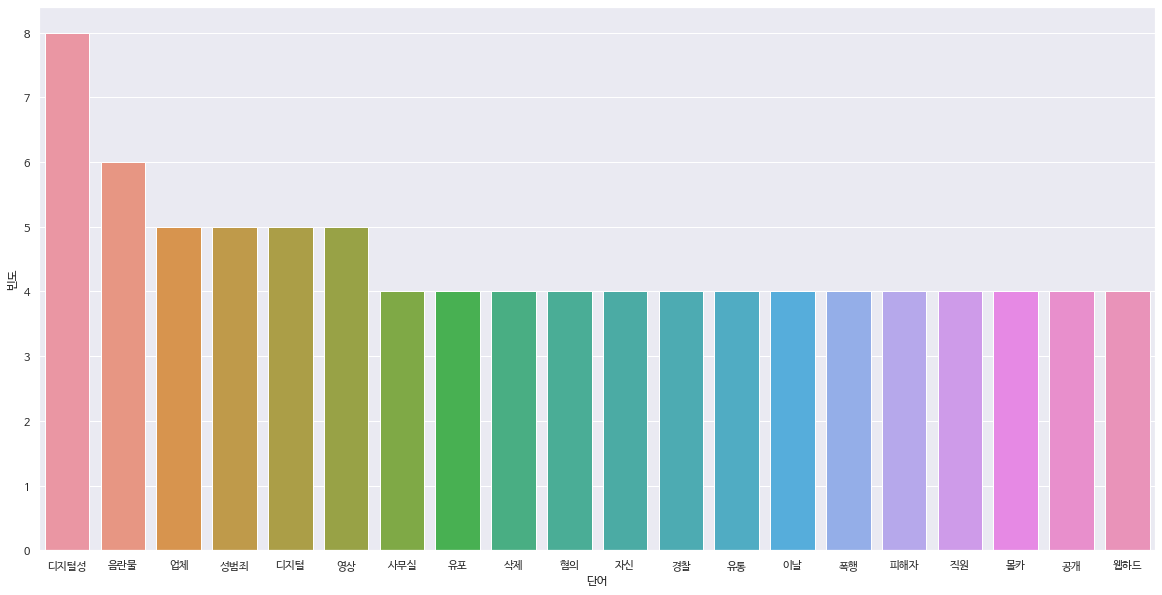

In [66]:
sns.barplot(x = '단어', y = '빈도', data=donga_word_df)

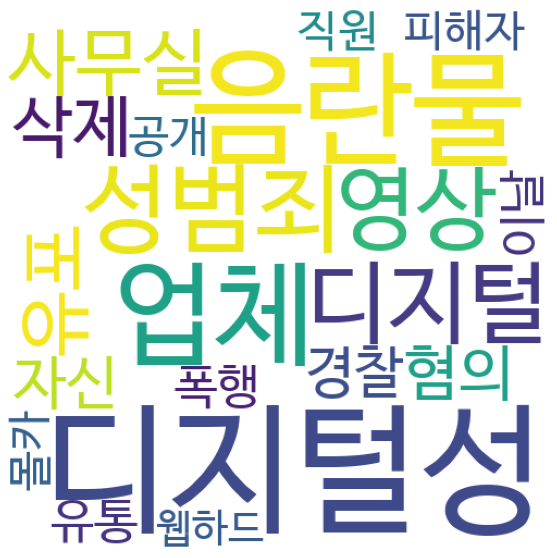

In [67]:
wc = WordCloud(font_path = 'NanumBarunGothic',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(donga_word_df.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#공영방송

###공영방송은 표본 수가 상당히 적어 키워드 빈도 분석 x

###시각화도 하지 않음

###대신 어떤 기사가 있는 지만 확인

In [ ]:
kbs_df = text_df[text_df['언론사'].str.contains('KBS')] 
kbs_df

,일자,언론사,제목,키워드,특성추출,본문
29,2017-08-14,KBS,‘몰카 영상’ 거래까지…처벌은 ‘솜방망이’,"몰카,영상,거래,처벌,솜방망이,앵커,멘트,서울,병원,남자,간호사,휴대전화,간호사들,...","홍성희,간호사,분들,6백,간호사들,편당,휴대전화,인정욕구,디지털성,악의적,의뢰인,강...",<앵커 멘트> 서울의 한 병원에서 남자 간호사가 휴대전화로 동료 여성 간호사들의 ...
30,2017-08-15,KBS,‘몰카 영상’ 거래까지…처벌은 ‘솜방망이’,"몰카,영상,거래,처벌,솜방망이,앵커,멘트,서울,병원,남자,간호사,휴대전화,간호사들,...","홍성희,간호사,분들,6백,간호사들,편당,휴대전화,인정욕구,디지털성,악의적,의뢰인,강...",<앵커 멘트> 서울의 한 병원에서 남자 간호사가 휴대전화로 동료 여성 간호사들의 ...
245,2018-06-21,KBS,“‘몰카’ 지워주세요”…50일간 삭제 요청 500명 육박,"몰카,50일,삭제,요청,육박,정부,몰카,범죄,피해자들,4월,불법,촬영물,삭제,그동안...","피해자,촬영물,김채린,피해자들,온라인,3백,지원센터,3명,6개월,디지털성,4명,웹하...",[앵커] 정부가 이른바 '몰카' 범죄 피해자들을 위해 지난 4월부터 불법 촬영물을...
247,2018-06-22,KBS,정부에 “‘몰카’ 지워주세요”…50일 만에 2천여 건 신고,"정부,몰카,50일,2천,신고,정부,몰카,범죄,피해자들,4월,불법,촬영물,삭제,그동안...","피해자,촬영물,김채린,피해자들,2천,온라인,3백,지원센터,3명,6개월,디지털성,4명...",[앵커] 정부가 이른바 '몰카' 범죄 피해자들을 위해 지난 4월부터 불법 촬영물을...
249,2018-06-22,KBS,정부에 “‘몰카’ 지워주세요”…50일 만에 2천여 건 신고,"정부,몰카,50일,2천,신고,정부,몰카,범죄,피해자들,4월,불법,촬영물,삭제,그동안...","피해자,촬영물,김채린,피해자들,2천,온라인,3백,지원센터,3명,6개월,디지털성,4명...",[앵커] 정부가 이른바 '몰카' 범죄 피해자들을 위해 지난 4월부터 불법 촬영물을...
445,2018-11-08,KBS,불법촬영물 삭제비용 가해자에 청구…“최고 천만 원대 물어야”,"가해자,불법,촬영물,삭제,비용,청구,최고,원대,피해자,파괴,범죄,불법,촬영물,유포,...","피해자,구상권,가해자,불법촬영물,김채린,형사재판,웹하드,여성가족부,온라인,촬영물,성...",[앵커] 피해자의 삶을 파괴하는 불법촬영물 유포 범죄. 최근 양진호 회장 사건에...
448,2018-11-09,KBS,불법촬영물 삭제 비용 가해자에 청구한다…“최고 천만 원”,"불법,촬영물,삭제,비용,가해자,청구,최고,피해자,파괴,범죄,불법,촬영물,유포,사건,...","피해자,가해자,구상권,불법촬영물,김채린,형사재판,웹하드,여성가족부,온라인,촬영물,성...",[앵커] 피해자의 삶을 파괴하는 불법촬영물 유포 범죄. 최근 양진호 회장 사건에...
559,2019-01-25,KBS,불법음란물 유통 카르텔 뿌리뽑는다…“범죄수익 몰수·처벌 강화”,"불법,음란물,유통,카르텔,뿌리,범죄수익,몰수,처벌,강화,구속,기소,회장,양진호,위디...","웹하드,음란물,김수연,피해자,관련법,촬영물,과징금,양진호,위디스크,더불어,신기술,여...",[앵커] 구속 기소된 양진호 위디스크 회장은 웹하드 업체와 불법 촬영물 필터링 업...
748,2019-07-17,KBS,"“불법 촬영물 95% 해외 서버 유통”…방심위, 구글 등과 공조","불법,촬영물,95%,해외,서버,유통,방심위,구글,공조,불법,촬영물,온라인,유포,디지...","방심위,사업자,손서영,원정보,구글,방송통신심의위원회,위원회,온라인,피해자,촬영물,상...",[앵커] 불법 촬영물을 찍어 온라인에 유포하는 '디지털 성범죄'는 대부분 해외 서버...
749,2019-07-17,KBS,"“불법 촬영물 95% 해외 서버 유통”…방심위, 구글 등과 공조","불법,촬영물,95%,해외,서버,유통,방심위,구글,공조,불법,촬영물,온라인,유포,디지...","방심위,사업자,구글,방송통신심의위원회,손서영,원정보,kbs,위원회,온라인,피해자,성...",[앵커] 불법 촬영물을 찍어 온라인에 유포하는 '디지털 성범죄'가 날로 대담해지고...


In [ ]:
kbs_cha_df = kbs_df[['일자', '언론사', '제목']].reset_index().drop(columns = 'index') #일자 언론사, 제목만 추출 + 인덱스 칼럼 제거
kbs_cha_df

,일자,언론사,제목
0,2017-08-14,KBS,‘몰카 영상’ 거래까지…처벌은 ‘솜방망이’
1,2017-08-15,KBS,‘몰카 영상’ 거래까지…처벌은 ‘솜방망이’
2,2018-06-21,KBS,“‘몰카’ 지워주세요”…50일간 삭제 요청 500명 육박
3,2018-06-22,KBS,정부에 “‘몰카’ 지워주세요”…50일 만에 2천여 건 신고
4,2018-06-22,KBS,정부에 “‘몰카’ 지워주세요”…50일 만에 2천여 건 신고
5,2018-11-08,KBS,불법촬영물 삭제비용 가해자에 청구…“최고 천만 원대 물어야”
6,2018-11-09,KBS,불법촬영물 삭제 비용 가해자에 청구한다…“최고 천만 원”
7,2019-01-25,KBS,불법음란물 유통 카르텔 뿌리뽑는다…“범죄수익 몰수·처벌 강화”
8,2019-07-17,KBS,"“불법 촬영물 95% 해외 서버 유통”…방심위, 구글 등과 공조"
9,2019-07-17,KBS,"“불법 촬영물 95% 해외 서버 유통”…방심위, 구글 등과 공조"


In [ ]:
sbs_df = text_df[text_df['언론사'].str.contains('SBS')]
sbs_df

,일자,언론사,제목,키워드,특성추출,본문
442,2018-11-07,SBS,'음란 몰카' 무분별 유통…'피해자 눈물'로 돈 번 양진호,"음란,몰카,무분별,유통,피해자,눈물,양진호,앵커,6일,양진호,회장,웹하드,업체,재산...","피해자,웹하드,팀장,돈벌이,양진호,촬영물,영상들,반년,2만,피눈물,1천만,성범죄,엄...","<앵커> 저희가 어제(6일)도 자세히 전해드렸지만, 양진호 회장은 웹하드 업체를..."
452,2018-11-11,SBS,"용기 내 연락주세요""…불법 촬영물과의 '삭제 전쟁'""","용기,연락,불법,촬영물,삭제,전쟁,앵커,양진호,사람,재산,밑바탕,동영상,불법,촬영,...","촬영물,피해자,박성혜,팀장,2천,범죄인,2만,개씩,지원센터,8명,김준희,p2p,김경...",<앵커> 양진호란 사람이 뉴스에 오르내리면서 양 씨 재산에 밑바탕이 됐던 불법 ...


In [ ]:
sbs_cha_df = sbs_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
sbs_cha_df

,언론사,제목,키워드
0,SBS,'음란 몰카' 무분별 유통…'피해자 눈물'로 돈 번 양진호,"음란,몰카,무분별,유통,피해자,눈물,양진호,앵커,6일,양진호,회장,웹하드,업체,재산..."
1,SBS,"용기 내 연락주세요""…불법 촬영물과의 '삭제 전쟁'""","용기,연락,불법,촬영물,삭제,전쟁,앵커,양진호,사람,재산,밑바탕,동영상,불법,촬영,..."


In [ ]:
mbc_df = text_df[text_df['언론사'].str.contains('MBC')]
mbc_df

,일자,언론사,제목,키워드,특성추출,본문
244,2018-06-21,MBC,디지털성범죄 피해 1천 건 육박…'불법촬영' 최다,"디지털성,범죄,피해,1천,육박,불법촬영,최다,50일,디지털성,디지털,범죄,지원센터,...","불법촬영,피해자,지원센터,1천,디지털성,신고가,배우자,여성가족부,영상물,993건,7...",최근 50일 동안 '디지털성범죄 지원센터'에 1천 건에 가까운 피해 신고가 접수됐습...
306,2018-08-01,MBC,"[뉴스터치] 불법 촬영물 4,584건 즉시 삭제 外","삭제,불법,촬영물,즉시,삭제,화제,뉴스터치,소식,소식,방송통신위원회,디지털성,범죄,...","영상물,미국,영업이익,직원들,5곳,업체들,관리청,소비자,9주,4천,콜먼,국제유가,신...",◀ 앵 커 ▶ 화제의 뉴스를 모아 짚어드리는 <뉴스터치> 시간입니다. 오늘 소식 ...
392,2018-10-11,MBC,단순 삭제론 끝 없어…'100% 차단기술' 왜 외면?,"차단기술,단순,삭제,100%,차단,앵커,SNS,불법,영상,유통,영상파일,공유,웹하드...","웹하드,음란물,방송통신심의위원회,관계자,정동훈,피해자,업체들,디지털성,2백,의무화,...",◀ 앵커 ▶ SNS와 함께 불법영상 유통의 또 다른 한 축은 영상파일을 공유하는 이...
455,2018-11-13,MBC,"제발 지워주세요"" 하루 2백~3백 건…""웹하드 처벌 강화""""","하루,2백,3백,웹하드,처벌,강화,앵커,양진호,회장,운영,위디스크,웹하드,불법,유통...","음란물,웹하드,남재현,매출액,과징금,3백,디지털성,사실상,팀장,피해자,방송통신위원회...",◀ 앵커 ▶ 양진호 회장이 운영한 위디스크처럼 웹하드 등을 통해 불법으로 유통되는 ...
464,2018-11-14,MBC,"불법 음란물 피해자 1,800명…웹하드 업체 '철퇴' 추진","불법,음란물,피해자,웹하드,업체,철퇴,추진,앵커,적발,음란물,14만,사생활,노출,피...","음란물,웹하드,피해자,남재현,800명,과징금,800명,매출액,방송통신위원회,7건,3...",◀ 앵커 ▶ 올 들어 적발된 음란물은 14만 건. 사생활이 노출된 피해자는 확인된 ...
700,2019-05-13,MBC,비판만 있고 성찰 없었던 '기자'들의 민낯…수사,"비판,성찰,민낯,수사,앵커,PD,언론계,종사자들,단체,대화방,불법,촬영,음란,영상물...","대화방,이기주,물뽕,버닝썬,영상물,성폭력,고발장,pd,운영자,범죄아웃,디지털성,사무...","◀ 앵커 ▶ 기자와 PD 등 언론계 종사자들이 모여있는 단체 대화방에서, 불법 촬영..."


In [ ]:
mbc_cha_df = mbc_df[['언론사', '제목', '키워드']].reset_index().drop(columns = 'index')
mbc_cha_df

,언론사,제목,키워드
0,MBC,디지털성범죄 피해 1천 건 육박…'불법촬영' 최다,"디지털성,범죄,피해,1천,육박,불법촬영,최다,50일,디지털성,디지털,범죄,지원센터,..."
1,MBC,"[뉴스터치] 불법 촬영물 4,584건 즉시 삭제 外","삭제,불법,촬영물,즉시,삭제,화제,뉴스터치,소식,소식,방송통신위원회,디지털성,범죄,..."
2,MBC,단순 삭제론 끝 없어…'100% 차단기술' 왜 외면?,"차단기술,단순,삭제,100%,차단,앵커,SNS,불법,영상,유통,영상파일,공유,웹하드..."
3,MBC,"제발 지워주세요"" 하루 2백~3백 건…""웹하드 처벌 강화""""","하루,2백,3백,웹하드,처벌,강화,앵커,양진호,회장,운영,위디스크,웹하드,불법,유통..."
4,MBC,"불법 음란물 피해자 1,800명…웹하드 업체 '철퇴' 추진","불법,음란물,피해자,웹하드,업체,철퇴,추진,앵커,적발,음란물,14만,사생활,노출,피..."
5,MBC,비판만 있고 성찰 없었던 '기자'들의 민낯…수사,"비판,성찰,민낯,수사,앵커,PD,언론계,종사자들,단체,대화방,불법,촬영,음란,영상물..."
